In [1]:
import sys
import os
from pathlib import Path
import json
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Get the absolute path of the tiktokresearch directory
repo_path = os.path.abspath("../tiktokresearch")
sys.path.append(repo_path)

import tiktokresearch as tiktok

/mnt/helios/pranay22/miniconda3/envs/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
client_key = os.environ.get("TIKTOK_CLIENT_KEY")
client_secret = os.environ.get("TIKTOK_CLIENT_SECRET")
tiktok_api = tiktok.TikTokAPI(client_key, client_secret)

In [3]:
def query_comments(
        video_ids,
        fields=["id", "video_id", "text", "like_count", "reply_count", "parent_comment_id", "create_time"],
        count_per_page=100,
        max_count=100000,
        max_trials=3,
        verbose=False,
        showProgress=True
    ):
    all_comments = {}

    for video_id in video_ids:
        comments, response, error = tiktok_api.query_comments(
            video_id=video_id,
            fields=fields,
            count_per_page=count_per_page,
            max_count=max_count,
            max_trials=max_trials,
            verbose=verbose,
            showProgress=showProgress
        )

        if error:
            print(f"Error fetching comments for video {video_id}: {error}")
            all_comments[video_id] = None  # Store None if there's an error
        else:
            print(f"Fetched {len(comments)} comments for video {video_id}")
            all_comments[video_id] = comments

    return all_comments

In [4]:
# Define the directory containing JSON files
collected_directory = Path("/mnt/helios/tiktok/Data/collected")

In [5]:
# Load and concatenate JSON data
dataframes = []
for json_file in collected_directory.glob("mental*.json"):  # Match files starting with "mental"
    with open(json_file, "r", encoding="utf-8") as f:
        data = json.load(f)  # Parse JSON
        if "results" in data:  # Ensure "results" key exists
            df = pd.DataFrame(data["results"])
            df["source_file"] = json_file.name  # Add source filename column
            dataframes.append(df)

In [6]:
combined_df = pd.concat(dataframes, ignore_index=True)

In [7]:
combined_df['id'] = combined_df['id'].astype(str)

In [8]:
combined_df['music_id'] = combined_df['music_id'].astype(str)

In [9]:
filtered_df = combined_df[combined_df['comment_count'] > 0]

In [10]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27718 entries, 0 to 43214
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   share_count        27718 non-null  int64  
 1   username           27718 non-null  object 
 2   video_description  27718 non-null  object 
 3   comment_count      27718 non-null  float64
 4   create_time        27718 non-null  int64  
 5   hashtag_names      27718 non-null  object 
 6   id                 27718 non-null  object 
 7   like_count         27718 non-null  float64
 8   music_id           27718 non-null  object 
 9   region_code        27718 non-null  object 
 10  view_count         27718 non-null  int64  
 11  effect_ids         989 non-null    object 
 12  voice_to_text      2708 non-null   object 
 13  playlist_id        483 non-null    float64
 14  source_file        27718 non-null  object 
 15  favorites_count    2061 non-null   float64
dtypes: float64(4), int64(3), ob

In [11]:
filtered_df

,share_count,username,video_description,comment_count,create_time,hashtag_names,id,like_count,music_id,region_code,view_count,effect_ids,voice_to_text,playlist_id,source_file,favorites_count
0,0,nikkirobbi,#mentalhealthmatters #mentalhealthawareness #d...,11.0,1685992641,"[mentalhealthmatters, mentalhealthawareness, d...",7241283196241874219,46.0,7.24128320968878e+18,US,11,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN
1,0,this.ls.me.trying,I miss who I used to be. #depression #anxiety ...,1.0,1686005794,"[sad, depressed, anxiety, bipolar, mentalillne...",7241339690962488622,51.0,7.080005542764137e+18,US,19,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN
3,0,amandadanielle32,#mentalhealthmatters #mentalhealthawareness #m...,7.0,1685982335,"[mentalhealth, mentalhealthmatters, mentalheal...",7241238903401893163,63.0,7.130767063748005e+18,US,48,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN
5,0,vannabae2020,#mentalhealthawareness #mentalhealthmatters #m...,1.0,1686009235,"[mentalillness, mentalhealthmatters, mentalhea...",7241354472600079662,11.0,6.971646779532004e+18,US,1,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN
6,0,adam_pea,#june #mentalhealthawareness #mentalhealthmatt...,1.0,1685975027,"[june, mentalhealth, mentalhealthmatters, ment...",7241207492703817003,8.0,7.11833678546112e+18,US,1,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43210,4,leahmarieycrochets,#mentalhealthawareness #mentalhealthmatters #g...,7.0,1685832462,"[foryou, goviral, mentalhealthmatters, mentalh...",7240595192665935130,226.0,7.233784900280012e+18,GB,2166,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN
43211,0,annapedersonn,#mentalhealthawareness #mentalheath #mentalhea...,18.0,1685759086,"[fyp, mentalhealthmatters, mentalhealthawarene...",7240280076950998318,177.0,7.178954695652937e+18,US,43,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN
43212,4,y0ursaf3place_,#sh #mentalhealthmatters #mentalhealthawarenes...,31.0,1685780136,"[sh, mentalhealthmatters, mentalhealthawarenes...",7240370538189786394,698.0,6.986301024097127e+18,DE,2909,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN
43213,11,8at.m4n,only girl i need n want 🙏 – #MentalHealth #men...,15.0,1685805771,"[fyp, mentalhealth, ilovemygf, vent, mentalhea...",7240480621590514971,206.0,7.121429139239833e+18,GB,1018,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN


In [12]:
# Extract unique video ids from the 'id' column
video_ids = filtered_df['id'].unique().tolist()

In [13]:
len(video_ids)

16576

In [14]:
# Extract the batch of video IDs from your list
video_batch = video_ids[11000:11500]

In [15]:
comments_data = query_comments(video_batch)

Fetched 7 comments for video 7371431771310738719


Fetched 3 comments for video 7371462540116774177


Fetched 4 comments for video 7371412327243025697


Fetched 1 comments for video 7371462931705384197


Error fetching comments for video 7238476053293845766: 'data'


Fetched 6 comments for video 7238729851228654894


Fetched 1 comments for video 7238518016542068011


Fetched 0 comments for video 7238504739984428331


Error fetching comments for video 7238625707843194113: 'data'


Error fetching comments for video 7238496217687379246: 'data'


Fetched 2 comments for video 7238430938202426670


Fetched 1 comments for video 7238411542516075818


Error fetching comments for video 7238478838416559366: 'data'


Fetched 0 comments for video 7238619963265764635


Fetched 4 comments for video 7238757393109208362


Fetched 17 comments for video 7238648886301183275


Error fetching comments for video 7238660916965936426: 'data'


Fetched 2 comments for video 7238690013662219547


Error fetching comments for video 7238480780052237610: 'data'


Fetched 5 comments for video 7238744537256955178


Error fetching comments for video 7238567337044004122: 'data'


Fetched 1 comments for video 7238579229116419355


Fetched 2 comments for video 7238670485905526042


Error fetching comments for video 7238609362820877594: 'data'


Fetched 1 comments for video 7238700237014125870


Fetched 4 comments for video 7238607333046177067


Error fetching comments for video 7238718181177609499: 'data'


Fetched 1 comments for video 7238747861804928299


Error fetching comments for video 7238699393904397595: 'data'


Fetched 0 comments for video 7238534057867480321


Fetched 1 comments for video 7238581496183917850


Fetched 1 comments for video 7238438097480912170


Fetched 1 comments for video 7238449753179131182


Fetched 0 comments for video 7238447863926164782


Fetched 0 comments for video 7238698878575447322


Fetched 4 comments for video 7238412627418844459


Fetched 11 comments for video 7238581693915909381


Fetched 3 comments for video 7238685444878208282


Fetched 1 comments for video 7238410803391614251


Fetched 0 comments for video 7238559561827831083


Fetched 2 comments for video 7238713472484363566


Fetched 4 comments for video 7238532981403503877


Fetched 0 comments for video 7238664154909855019


Fetched 0 comments for video 7238658883739340058


Fetched 3 comments for video 7238729545279458586


Fetched 11 comments for video 7238575132044774682


Error fetching comments for video 7238459387499515179: 'data'


Error fetching comments for video 7238594307077311786: 'data'


Fetched 2 comments for video 7238405291606330667


Fetched 4 comments for video 7238511842744601882


Fetched 2 comments for video 7238417711011925294


Fetched 1 comments for video 7238436118402927918


Error fetching comments for video 7238629902382124315: 'data'


Error fetching comments for video 7238412935842909483: 'data'


Fetched 1 comments for video 7238571919912537370


Fetched 3 comments for video 7238656985938562350


Error fetching comments for video 7238676988049755434: 'data'


Error fetching comments for video 7238715997946006810: 'data'


Fetched 1 comments for video 7238692863012326699


Fetched 0 comments for video 7238554556513160450


Fetched 0 comments for video 7238730318000229658


Fetched 6 comments for video 7238744202069249323


Fetched 0 comments for video 7238668980657851675


Fetched 5 comments for video 7238657387270376731


Fetched 6 comments for video 7238752056201350446


Fetched 0 comments for video 7238527052687625474


Fetched 0 comments for video 7238523856846097669


Fetched 1 comments for video 7238540709857447194


Fetched 5 comments for video 7238460205229493550


Fetched 20 comments for video 7238411696044248363


Error fetching comments for video 7238451579836239147: 'data'


Fetched 0 comments for video 7238722043418545426


Fetched 1 comments for video 7238682633956248874


Error fetching comments for video 7238725903734295835: 'data'


Error fetching comments for video 7238544451293973786: 'data'


Fetched 1 comments for video 7238484995881405723


Fetched 5 comments for video 7238602033849290027


Fetched 5 comments for video 7238655847432310058


Fetched 5 comments for video 7238431597286935851


Fetched 0 comments for video 7238578184684391722


Error fetching comments for video 7238462767617936683: 'data'


Fetched 5 comments for video 7238554166547729666


Fetched 89 comments for video 7238701994964225323


Fetched 4 comments for video 7225622922293955883


Fetched 3 comments for video 7225656877202410779


Fetched 2 comments for video 7225616313870208282


Fetched 3 comments for video 7225616994777779498


Fetched 12 comments for video 7225489150575742235


Fetched 1 comments for video 7225486293264878854


Fetched 0 comments for video 7225473599556029739


Fetched 2 comments for video 7225762776336174337


Error fetching comments for video 7225655863539731738: 'data'


Fetched 2 comments for video 7225762309187276078


Error fetching comments for video 7225708870801394970: 'data'


Error fetching comments for video 7225597994345811206: 'data'


Fetched 7 comments for video 7225757219495824686


Error fetching comments for video 7225617309300198683: 'data'


Error fetching comments for video 7225428810215197998: 'data'


Fetched 5 comments for video 7225640488576109867


Fetched 1 comments for video 7225757039639694593


Fetched 1 comments for video 7225731212906892590


Fetched 3 comments for video 7225418328716741914


Error fetching comments for video 7225695391813995819: 'data'


Fetched 1 comments for video 7225424929989168410


Error fetching comments for video 7225585182936419611: 'data'


Fetched 0 comments for video 7225747796144459035


Fetched 3 comments for video 7225760329404370203


Fetched 3 comments for video 7225689678165429530


Fetched 0 comments for video 7225460737337052422


Error fetching comments for video 7225463300790783259: 'data'


Fetched 0 comments for video 7225615139704179973


Fetched 2 comments for video 7225607707527728411


Error fetching comments for video 7225635208618446107: 'data'


Fetched 4 comments for video 7225690581924613403


Fetched 1 comments for video 7225435578190351658


Error fetching comments for video 7225637244760050970: 'data'


Fetched 0 comments for video 7225480608393235717


Fetched 1 comments for video 7225737773310020869


Fetched 0 comments for video 7225449727037394222


Fetched 9 comments for video 7225519546898140442


Fetched 1 comments for video 7225741127981387054


Fetched 15 comments for video 7225409952792644910


Fetched 1 comments for video 7225630691034271003


Fetched 2 comments for video 7225617396407602475


Fetched 2 comments for video 7225650680390765850


Fetched 12 comments for video 7225602364504395051


Fetched 0 comments for video 7225442513081879850


Fetched 1 comments for video 7225750254317096219


Error fetching comments for video 7225703777565691162: 'data'


Fetched 3 comments for video 7225577700675570986


Fetched 2 comments for video 7225620007923748104


Error fetching comments for video 7225562289896787226: 'data'


Fetched 0 comments for video 7225659038082567450


Fetched 4 comments for video 7225608100173204763


Fetched 2 comments for video 7225686673693150490


Fetched 3 comments for video 7225619270091197738


Fetched 0 comments for video 7225472001421462830


Error fetching comments for video 7225662635797171482: 'data'


Fetched 1 comments for video 7225437126517640490


Error fetching comments for video 7225688172892605738: 'data'


Fetched 5 comments for video 7225634167978085675


Fetched 500 comments for video 7225628430795066625


Fetched 1 comments for video 7225517587684183322


Error fetching comments for video 7225662571196599578: 'data'


Fetched 3 comments for video 7225402354105896234


Fetched 2 comments for video 7225606157920931078


Fetched 0 comments for video 7225662186582986010


Fetched 2 comments for video 7225536829079047442


Fetched 1 comments for video 7225628046944947482


Fetched 9 comments for video 7225696089641356571


Fetched 1 comments for video 7225418854246173954


Error fetching comments for video 7225569539319270657: 'data'


Error fetching comments for video 7225670801826139418: 'data'


Fetched 0 comments for video 7222559618571046149


Fetched 300 comments for video 7222707680031362309


Fetched 1 comments for video 7222705723338231083


Error fetching comments for video 7222613380014542107: 'data'


Error fetching comments for video 7222639394576944390: 'data'


Error fetching comments for video 7222431681620266245: 'data'


Fetched 0 comments for video 7222753818985991425


Fetched 1 comments for video 7222760324439608618


Error fetching comments for video 7222748326331043099: 'data'


Fetched 1 comments for video 7222781925746953498


Fetched 0 comments for video 7222715206613404934


Fetched 2 comments for video 7222516879632387334


Fetched 2 comments for video 7222717563552271659


Fetched 1 comments for video 7222784976507374875


Error fetching comments for video 7222617936266087682: 'data'


Error fetching comments for video 7222768893964619014: 'data'


Fetched 0 comments for video 7222444133611277574


Error fetching comments for video 7222789751974202629: 'data'


Fetched 5 comments for video 7222798404705946885


Fetched 0 comments for video 7222587639818390789


Fetched 1 comments for video 7222487065244519685


Error fetching comments for video 7222765032193527046: 'data'


Error fetching comments for video 7222610843723173126: 'data'


Fetched 9 comments for video 7222616668353105194


Fetched 3 comments for video 7222705854426959110


Fetched 9 comments for video 7222664395967433989


Fetched 1 comments for video 7222649692545502507


Fetched 2 comments for video 7222670982060821766


Error fetching comments for video 7222715544372514094: 'data'


Fetched 33 comments for video 7222580319717739781


Fetched 0 comments for video 7222761925036363014


Error fetching comments for video 7222558802367876357: 'data'


Error fetching comments for video 7222765083405847813: 'data'


Error fetching comments for video 7222709257643265286: 'data'


Fetched 0 comments for video 7222754174910385414


Fetched 1 comments for video 7222504975207763246


Fetched 2 comments for video 7222624398862306587


Fetched 0 comments for video 7222542631677578514


Error fetching comments for video 7237518109790326043: 'data'


Fetched 12 comments for video 7237621285923097899


Fetched 0 comments for video 7237292354179255595


Error fetching comments for video 7237481343234444545: 'data'


Fetched 4 comments for video 7237613667284503850


Fetched 15 comments for video 7237344556054990122


Fetched 5 comments for video 7237306612279495942


Error fetching comments for video 7237634822254955818: 'data'


Error fetching comments for video 7237451224512122118: 'data'


Fetched 0 comments for video 7237594387092442395


Fetched 1 comments for video 7237537511319555374


Fetched 3 comments for video 7237474975979015467


Fetched 3 comments for video 7237617725357444395


Fetched 2 comments for video 7237328043591732526


Fetched 1 comments for video 7237502966339505413


Fetched 0 comments for video 7237299534924172587


Fetched 4 comments for video 7237516167139577131


Fetched 0 comments for video 7237372632105012522


Fetched 0 comments for video 7237498742373453083


Fetched 2 comments for video 7237597333670612267


Fetched 2 comments for video 7237584233076772138


Fetched 0 comments for video 7237548515939994923


Error fetching comments for video 7237317035103882538: 'data'


Fetched 0 comments for video 7237557224975945003


Fetched 23 comments for video 7237300684993908014


Error fetching comments for video 7237403386692390150: 'data'


Fetched 3 comments for video 7237422196266749210


Error fetching comments for video 7237472535950986522: 'data'


Fetched 2 comments for video 7237645005894978843


Fetched 1 comments for video 7237549646862732590


Fetched 0 comments for video 7237578208055479557


Fetched 0 comments for video 7237644458001550634


Error fetching comments for video 7237496465688481050: 'data'


Fetched 0 comments for video 7237281444622519598


Fetched 1 comments for video 7237521859485486379


Fetched 0 comments for video 7237277659678444843


Fetched 1 comments for video 7237589215519821082


Error fetching comments for video 7237286153668463918: 'data'


Error fetching comments for video 7237294181629054234: 'data'


Fetched 1 comments for video 7237279929308630315


Fetched 6 comments for video 7237494637164907819


Error fetching comments for video 7237549830871092526: 'data'


Error fetching comments for video 7237601277243362586: 'data'


Fetched 586 comments for video 7237568337469869354


Fetched 1 comments for video 7237358721288998187


Fetched 1 comments for video 7237284803626798379


Fetched 4 comments for video 7237566154913369386


Error fetching comments for video 7237535797002456347: 'data'


Fetched 1 comments for video 7237315873000934702


Fetched 2 comments for video 7237528811577953579


Fetched 6 comments for video 7237551104362319130


Error fetching comments for video 7237561493519109419: 'data'


Error fetching comments for video 7237517449137048874: 'data'


Fetched 1 comments for video 7237395952284323077


Fetched 1 comments for video 7364435755235626286


Fetched 3 comments for video 7364526847389945130


Fetched 6 comments for video 7364426751826545962


Fetched 3 comments for video 7364399981823921441


Error fetching comments for video 7364366548338871570: 'data'


Fetched 5 comments for video 7364468187716504875


Fetched 2 comments for video 7364468415370628385


Error fetching comments for video 7364479560378895649: 'data'


Error fetching comments for video 7364534766739246368: 'data'


Fetched 1 comments for video 7364357117723233582


Fetched 2 comments for video 7364215338390523179


Fetched 2 comments for video 7364497447411830058


Fetched 46 comments for video 7364372227011415342


Fetched 3 comments for video 7364187063576481066


Error fetching comments for video 7364484607846157610: 'data'


Fetched 5 comments for video 7364374175424810271


Fetched 7 comments for video 7364501050100862241


Fetched 1 comments for video 7364379347815271712


Fetched 2 comments for video 7364194249560050986


Fetched 1 comments for video 7364479213279202603


Fetched 9 comments for video 7364365074661657889


Fetched 1 comments for video 7364224986434817322


Fetched 0 comments for video 7364372448113954094


Fetched 1 comments for video 7364454908684258602


Fetched 4 comments for video 7364508242132684074


Fetched 3 comments for video 7364446879251221802


Fetched 9 comments for video 7364508769545473323


Fetched 1 comments for video 7364382949233528107


Fetched 8 comments for video 7364456187460390176


Fetched 1 comments for video 7364439970574077227


Fetched 1 comments for video 7364434307726855467


Fetched 1 comments for video 7364228775514524971


Fetched 0 comments for video 7364460488744389934


Fetched 4 comments for video 7364458268833451306


Fetched 17 comments for video 7364343746827144480


Error fetching comments for video 7364414903593127214: 'data'


Fetched 2 comments for video 7364446517656046880


Fetched 1 comments for video 7364353477327228206


Fetched 1 comments for video 7232330465401654574


Fetched 2 comments for video 7232102127353466155


Error fetching comments for video 7232294627053751558: 'data'


Fetched 1 comments for video 7232126533391879451


Error fetching comments for video 7232203623613222187: 'data'


Error fetching comments for video 7232400832270994714: 'data'


Error fetching comments for video 7232154267459570949: 'data'


Error fetching comments for video 7232348231487769898: 'data'


Fetched 4 comments for video 7232387498570304794


Fetched 1 comments for video 7232375312275770651


Fetched 2 comments for video 7232116062324624686


Fetched 0 comments for video 7232339510682455323


Fetched 0 comments for video 7232356325408165147


Fetched 6 comments for video 7232160899904081157


Fetched 1 comments for video 7232402104847961386


Fetched 3 comments for video 7232368919657418027


Fetched 15 comments for video 7232280917216185643


Fetched 5 comments for video 7232389518668729643


Fetched 9 comments for video 7232413167450721582


Fetched 1 comments for video 7232383006575463686


Error fetching comments for video 7232437025276742954: 'data'


Fetched 2 comments for video 7232104876296326446


Fetched 2 comments for video 7232129067288415534


Fetched 2 comments for video 7232145351686540590


Fetched 3 comments for video 7232288764645838126


Fetched 0 comments for video 7232123722998598954


Error fetching comments for video 7232337340981579054: 'data'


Fetched 62 comments for video 7232385652992593198


Error fetching comments for video 7232284918770863406: 'data'


Fetched 87 comments for video 7232279718840552730


Error fetching comments for video 7232442648588668206: 'data'


Fetched 1 comments for video 7232135913743191342


Fetched 1 comments for video 7230309082870189354


Fetched 1 comments for video 7230561487884930347


Error fetching comments for video 7230517037485837594: 'data'


Fetched 21 comments for video 7230268504958651690


Fetched 4 comments for video 7230452515827911941


Error fetching comments for video 7230342330593692929: 'data'


Error fetching comments for video 7230477933150784810: 'data'


Fetched 1 comments for video 7230441297524411694


Fetched 1 comments for video 7230469729587252526


Fetched 1 comments for video 7230449865329904942


Fetched 2 comments for video 7230251457520356654


Error fetching comments for video 7230541215622532378: 'data'


Error fetching comments for video 7230519168066424106: 'data'


Error fetching comments for video 7230515039994760494: 'data'


Fetched 7 comments for video 7230592563604950314


Error fetching comments for video 7230497405572025643: 'data'


Fetched 1 comments for video 7230553212372143402


Fetched 1 comments for video 7230504814302530859


Fetched 0 comments for video 7230471999523392795


Error fetching comments for video 7230493252632235307: 'data'


Fetched 0 comments for video 7230533436669168939


Fetched 3 comments for video 7230541770570943790


Fetched 65 comments for video 7230486928062254379


Fetched 185 comments for video 7230456769166806273


Error fetching comments for video 7230316368694988074: 'data'


Fetched 8 comments for video 7230578781302361387


Error fetching comments for video 7230357286613519642: 'data'


Fetched 4 comments for video 7230275336720633134


Fetched 5 comments for video 7230252451083849003


Fetched 1 comments for video 7230289327970995498


Fetched 0 comments for video 7230332360733035802


Fetched 7 comments for video 7230273388722359595


Fetched 1 comments for video 7230546108685077802


Fetched 0 comments for video 7230389843694554410


Error fetching comments for video 7230592232372522286: 'data'


Fetched 1 comments for video 7230224092215971114


Error fetching comments for video 7230237961357511978: 'data'


Fetched 2 comments for video 7230264556231281966


Error fetching comments for video 7230485295072841006: 'data'


Error fetching comments for video 7230447205939776769: 'data'


Fetched 5 comments for video 7230417035950427435


Fetched 1 comments for video 7230489433970117915


Error fetching comments for video 7230303968281316650: 'data'


Fetched 1 comments for video 7230257407790779675


Fetched 1 comments for video 7230420989253995822


Fetched 1 comments for video 7230531711917133102


Fetched 0 comments for video 7230530203011861806


Fetched 0 comments for video 7230395409447881985


Error fetching comments for video 7230237386536471850: 'data'


Error fetching comments for video 7230264326521703723: 'data'


Fetched 14 comments for video 7230506666905652526


Fetched 0 comments for video 7230555067068206378


Fetched 12 comments for video 7230396500893814042


Fetched 1 comments for video 7230238738738122027


Fetched 2 comments for video 7230515004276034821


Fetched 0 comments for video 7230259595388914990


Fetched 0 comments for video 7230415488247991558


Fetched 9 comments for video 7230365609400306971


Error fetching comments for video 7230488568500669702: 'data'


Fetched 1 comments for video 7228421937083551018


Fetched 2 comments for video 7228415846211652906


Fetched 1 comments for video 7228370906291227946


Fetched 2 comments for video 7228671433851882778


Fetched 0 comments for video 7228696406377237802


Fetched 2 comments for video 7228561318826020142


Fetched 1 comments for video 7228429898711502126


Error fetching comments for video 7228415606834335018: 'data'


Fetched 3 comments for video 7228432892928593195


Fetched 0 comments for video 7228626650970328363


Error fetching comments for video 7228656017188375851: 'data'


Fetched 0 comments for video 7228604958248127771


Fetched 2 comments for video 7228377946212486446


Fetched 6 comments for video 7228666201738644779


Fetched 0 comments for video 7228726177404341550


Error fetching comments for video 7228459765733559598: 'data'


Fetched 1 comments for video 7228599446983036203


Fetched 3 comments for video 7228511718492753179


Error fetching comments for video 7228654037745339690: 'data'


Fetched 1 comments for video 7228714296723770625


Error fetching comments for video 7228389842760076587: 'data'


Fetched 1 comments for video 7228671945527643435


Fetched 17 comments for video 7228674442791062830


Fetched 4 comments for video 7228738706151066923


Fetched 1 comments for video 7228669864884407594


Fetched 0 comments for video 7228616442877447466


Fetched 0 comments for video 7228407169052413211


Fetched 0 comments for video 7228392553417133358


Fetched 4 comments for video 7228664671606197531


Fetched 2 comments for video 7228651973023747374


Fetched 3 comments for video 7228399595301276974


Fetched 2 comments for video 7228639603052285189


Fetched 2 comments for video 7228536414277963054


Fetched 3 comments for video 7228718986022669574


Fetched 7 comments for video 7228726801017654571


Fetched 6 comments for video 7228686632658930970


Error fetching comments for video 7228672336311110939: 'data'


Fetched 7 comments for video 7228662249307540779


Error fetching comments for video 7228409808993389866: 'data'


Fetched 1 comments for video 7228621431892938010


Error fetching comments for video 7228626269338914094: 'data'


Fetched 1 comments for video 7228701224722271531


Fetched 2 comments for video 7228452215428599066


Fetched 39 comments for video 7228680248567647495


Fetched 0 comments for video 7228640487068945710


Fetched 2 comments for video 7228609026806975790


Fetched 3 comments for video 7228685059975564590


Fetched 1 comments for video 7228526477929762053


Fetched 1 comments for video 7228384457579826474


Error fetching comments for video 7228398053210819842: 'data'


Fetched 1 comments for video 7228702428034633003


Error fetching comments for video 7228448335395392814: 'data'


Fetched 6 comments for video 7228627463486639403


Fetched 0 comments for video 7228491726749551899


Error fetching comments for video 7228688257385565482: 'data'


Fetched 2 comments for video 7228725131349151002


Error fetching comments for video 7228504497474063617: 'data'


Fetched 1 comments for video 7228631252696452378


Fetched 35 comments for video 7228605541461806379


Fetched 2 comments for video 7228627337284242730


Error fetching comments for video 7228386612743392555: 'data'


Fetched 0 comments for video 7228368668097318190


Error fetching comments for video 7228544173220089134: 'data'


Error fetching comments for video 7228397425713597742: 'data'


Fetched 1 comments for video 7228575818186804507


Fetched 1 comments for video 7228714315711335722


Fetched 1 comments for video 7228607914326379819


Fetched 3 comments for video 7228604466889592110


Fetched 3 comments for video 7228696176416132378


Fetched 5 comments for video 7228670832921349422


Fetched 16 comments for video 7228542237657861422


Error fetching comments for video 7228561232544959770: 'data'


Fetched 18 comments for video 7228387586258062635


Error fetching comments for video 7228412317397191982: 'data'


Fetched 11 comments for video 7228397573369810219


Fetched 1 comments for video 7228637293815352602


Fetched 2 comments for video 7228626292814515498


Fetched 5 comments for video 7228512103081135406


Fetched 0 comments for video 7228594560534940974


Fetched 2 comments for video 7228565736984251654


Fetched 1 comments for video 7228591700044860718


Fetched 4 comments for video 7228541757208726811


Fetched 1 comments for video 7228722268380351790


Error fetching comments for video 7228550152338820354: 'data'


Fetched 1 comments for video 7228601596488322346


Fetched 5 comments for video 7228726432992611626


Error fetching comments for video 7228721759476813099: 'data'


Error fetching comments for video 7228551803686685978: 'data'


Fetched 1 comments for video 7228598577616997658


Fetched 0 comments for video 7228678529079119147


Fetched 1 comments for video 7228602191991328042


Fetched 2 comments for video 7228703040960744730


Fetched 3 comments for video 7228372882357751083


Fetched 1 comments for video 7228371573819034926


Fetched 15 comments for video 7228563895110110507


Error fetching comments for video 7228591455034477850: 'data'


Fetched 1 comments for video 7231723927133850923


Error fetching comments for video 7231785234696621354: 'data'


Fetched 1 comments for video 7232035602211065134


Fetched 1 comments for video 7231925898126183686


Fetched 10 comments for video 7231935637056671018


Fetched 2 comments for video 7232031145590869274


Error fetching comments for video 7231793277886942469: 'data'


Fetched 10 comments for video 7231718297450990853


Error fetching comments for video 7231863370197110021: 'data'


Fetched 0 comments for video 7232030454679964954


Fetched 1 comments for video 7232023540286033198


Error fetching comments for video 7231871465321286938: 'data'


Fetched 23 comments for video 7231723959362817323


Error fetching comments for video 7232006240358960410: 'data'


Fetched 1 comments for video 7231910915476802862


Fetched 3 comments for video 7231712878884064555


Error fetching comments for video 7232046512920956203: 'data'


Fetched 1 comments for video 7232035782091902251


Fetched 11 comments for video 7231798005781892379


Error fetching comments for video 7231899387457211690: 'data'


Fetched 5 comments for video 7231913179968736555


Error fetching comments for video 7231827842227637531: 'data'


Error fetching comments for video 7231940029097184558: 'data'


Error fetching comments for video 7231917197377932571: 'data'


Fetched 7 comments for video 7232045777898507562


Fetched 40 comments for video 7231813631434902790


Fetched 2 comments for video 7231912734063971589


Fetched 0 comments for video 7231750699116252462


Fetched 1 comments for video 7231755001217961242


Error fetching comments for video 7231926160119041306: 'data'


In [16]:
comments_data

{'7371431771310738719': [{'text': '💘 Great audio with this post',
   'video_id': 7371431771310738719,
   'create_time': 1716815422,
   'id': 7373665896068219690,
   'like_count': 1,
   'parent_comment_id': 7371431771310738719,
   'reply_count': 1},
  {'video_id': 7371431771310738719,
   'create_time': 1716600767,
   'id': 7372744079677883167,
   'like_count': 1,
   'parent_comment_id': 7371431771310738719,
   'reply_count': 2,
   'text': 'Amen so true'},
  {'text': '❤️❤️❤️🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻❤️❤️❤️',
   'video_id': 7371431771310738719,
   'create_time': 1716414694,
   'id': 7371944883899056942,
   'like_count': 1,
   'parent_comment_id': 7371431771310738719,
   'reply_count': 1},
  {'text': 'so real 🩷🩷',
   'video_id': 7371431771310738719,
   'create_time': 1716336362,
   'id': 7371608480136807199,
   'like_count': 1,
   'parent_comment_id': 7371431771310738719,
   'reply_count': 1},
  {'id': 7371437932575572779,
   'like_count': 1,
   'parent_comment_id': 7371431771310738719,
   'reply_count': 

In [17]:
# Combine all comments from the batch into a single list
combined_comments = []
for vid, comments in comments_data.items():
    if comments:  # Only add if comments exist (avoid None)
        combined_comments.extend(comments)
    else:
        print(f"No comments retrieved for video {vid}.")

No comments retrieved for video 7238476053293845766.
No comments retrieved for video 7238504739984428331.
No comments retrieved for video 7238625707843194113.
No comments retrieved for video 7238496217687379246.
No comments retrieved for video 7238478838416559366.
No comments retrieved for video 7238619963265764635.
No comments retrieved for video 7238660916965936426.
No comments retrieved for video 7238480780052237610.
No comments retrieved for video 7238567337044004122.
No comments retrieved for video 7238609362820877594.
No comments retrieved for video 7238718181177609499.
No comments retrieved for video 7238699393904397595.
No comments retrieved for video 7238534057867480321.
No comments retrieved for video 7238447863926164782.
No comments retrieved for video 7238698878575447322.
No comments retrieved for video 7238559561827831083.
No comments retrieved for video 7238664154909855019.
No comments retrieved for video 7238658883739340058.
No comments retrieved for video 72384593874995

In [18]:
# Create the final nested dictionary
output_data = {"results": combined_comments}

In [19]:
# Define the output file name
output_file = f"comments_batch_11000_11500.json"

In [20]:
# Save the combined comments to a single JSON file
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(output_data, f, indent=4, ensure_ascii=False)

In [22]:
# Load the JSON file
with open("comments_batch_11000_11500.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [23]:
# Convert the list of comments (under the "results" key) into a DataFrame
df = pd.DataFrame(data["results"])

In [24]:
df

,text,video_id,create_time,id,like_count,parent_comment_id,reply_count
0,💘 Great audio with this post,7371431771310738719,1716815422,7373665896068219690,1,7371431771310738719,1
1,Amen so true,7371431771310738719,1716600767,7372744079677883167,1,7371431771310738719,2
2,❤️❤️❤️🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻❤️❤️❤️,7371431771310738719,1716414694,7371944883899056942,1,7371431771310738719,1
3,so real 🩷🩷,7371431771310738719,1716336362,7371608480136807199,1,7371431771310738719,1
4,"This is so true, the older I get the more I wi...",7371431771310738719,1716296668,7371437932575572779,1,7371431771310738719,1
...,...,...,...,...,...,...,...
3116,☺️☺️☺️,7231813631434902790,1683897528,7232238538254140166,0,7231813631434902790,0
3117,Looking fresh,7231813631434902790,1684991926,7236984937073296154,0,7231813631434902790,0
3118,You got this 🥰,7231912734063971589,1683829853,7231994108410921734,1,7231912734063971589,2
3119,🥰🥰🥰🥰🥰,7231912734063971589,1684012552,7232778796318343941,0,7231912734063971589,0


In [24]:
# Use the current directory
input_folder = "."

# Find all JSON files
json_files = glob.glob(os.path.join(input_folder, "comments_batch_*.json"))

In [25]:
combined_comments = []

for file_path in json_files:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
        # Check if the JSON data has a 'results' key and extend the combined list
        if "results" in data:
            combined_comments.extend(data["results"])
        else:
            combined_comments.append(data)

In [26]:
# Create the final nested dictionary
output_data = {"results": combined_comments}

# Define the output file name
output_file = "comments_batch_0_10000.json"

In [27]:
# Save the combined comments to a single JSON file
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(output_data, f, indent=4, ensure_ascii=False)

### Sentiment Analysis

In [28]:
# For Sentiment Analysis using VADER
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from detoxify import Detoxify

In [29]:
# Initialize VADER
sid = SentimentIntensityAnalyzer()

In [30]:
# Initialize Detoxify model
detoxify_model = Detoxify('original')

In [31]:
# Define a function to analyze a single text
def analyze_text(text):
    # Get VADER sentiment scores
    sentiment = sid.polarity_scores(text)
    # Get Detoxify toxicity scores
    toxicity = detoxify_model.predict(text)
    # Combine the dictionaries into one
    combined = {**sentiment, **toxicity}
    return combined

In [32]:
# Load the JSON file
with open("comments_batch_0_10000.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [33]:
# Convert the list of comments (under the "results" key) into a DataFrame
df = pd.DataFrame(data["results"])

In [34]:
df

,create_time,id,like_count,parent_comment_id,reply_count,text,video_id
0,1682028893,7224259006213522181,1,7224255006159932677,1,You have a beautiful smile,7224255006159932677
1,1682058295,7224385287944684293,1,7224255006159932677,1,I'm glad you OK now.,7224255006159932677
2,1682775258,7227464661678703365,0,7224255006159932677,0,You survived gal🫂🫂🫂🫂🫂Jehovah protected you and...,7224255006159932677
3,1689527858,7256466813588226822,0,7224255006159932677,0,❤❤❤,7224255006159932677
4,1682046675,7224335398565282603,11,7224285550725844267,2,why we all got therapy on thursday tho,7224285550725844267
...,...,...,...,...,...,...,...
79538,1689648043,7256982996531692331,0,7226144265745763585,0,😂,7226144265745763585
79539,1689656568,7257019622431736582,0,7226144265745763585,0,Wha'i'lare,7226144265745763585
79540,1689975214,7258388135914177306,0,7226144265745763585,0,😂❤️👍,7226144265745763585
79541,1691159273,7263473629064266528,0,7226144265745763585,0,Everyday … mate 🥰,7226144265745763585


In [35]:
# Apply the analysis to each text in the DataFrame
# This creates a new column 'analysis' that contains a dictionary of scores for each row
df['analysis'] = df['text'].apply(analyze_text)

In [36]:
df['analysis']

0        {'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'comp...
1        {'neg': 0.0, 'neu': 0.336, 'pos': 0.664, 'comp...
2        {'neg': 0.0, 'neu': 0.498, 'pos': 0.502, 'comp...
3        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                               ...                        
79538    {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
79539    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
79540    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
79541    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
79542    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: analysis, Length: 79543, dtype: object

In [37]:
# If you want to expand these dictionaries into separate columns, you can do:
analysis_df = df['analysis'].apply(pd.Series)
data = pd.concat([df, analysis_df], axis=1)

# Display the first few rows to verify
data.head()

,create_time,id,like_count,parent_comment_id,reply_count,text,video_id,analysis,neg,neu,pos,compound,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,1682028893,7224259006213522181,1,7224255006159932677,1,You have a beautiful smile,7224255006159932677,"{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'comp...",0.0,0.238,0.762,0.7506,0.000963,0.000106,0.000167,0.000131,0.000190,0.000143
1,1682058295,7224385287944684293,1,7224255006159932677,1,I'm glad you OK now.,7224255006159932677,"{'neg': 0.0, 'neu': 0.336, 'pos': 0.664, 'comp...",0.0,0.336,0.664,0.7125,0.000678,0.000126,0.000181,0.000149,0.000185,0.000150
2,1682775258,7227464661678703365,0,7224255006159932677,0,You survived gal🫂🫂🫂🫂🫂Jehovah protected you and...,7224255006159932677,"{'neg': 0.0, 'neu': 0.498, 'pos': 0.502, 'comp...",0.0,0.498,0.502,0.8779,0.025349,0.000291,0.000687,0.002715,0.000955,0.000728
3,1689527858,7256466813588226822,0,7224255006159932677,0,❤❤❤,7224255006159932677,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,0.005231,0.000104,0.000379,0.000112,0.000282,0.000171
4,1682046675,7224335398565282603,11,7224285550725844267,2,why we all got therapy on thursday tho,7224285550725844267,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,0.001276,0.000097,0.000210,0.000095,0.000189,0.000136


In [38]:
# Save to CSV
data.to_csv('sentiment_data.csv', index=False)

In [2]:
# Load your data
sentiment_data = pd.read_csv("sentiment_data.csv")

In [3]:
# Group by 'video_id' and aggregate
aggregated_video = sentiment_data.groupby("video_id").agg({
    "neg": "mean",
    "neu": "mean",
    "pos": "mean",
    "compound": "mean",
    "toxicity": "mean",
    "severe_toxicity": "mean",
    "obscene": "mean",
    "threat": "mean",
    "insult": "mean",
    "identity_attack": "mean",
    # Optionally, sum counts or other metrics if desired:
    "reply_count": "sum",
    "like_count": "sum",
    # Count the number of comments per video:
    "text": "count"
}).rename(columns={"text": "comment_count"})

In [4]:
# Reset index so that 'video_id' becomes a column again
aggregated_video.reset_index(inplace=True)

In [5]:
aggregated_video

,video_id,neg,neu,pos,compound,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,reply_count,like_count,comment_count
0,7222060846174833926,0.018750,0.465750,0.390500,0.397238,0.037982,0.000205,0.005036,0.000210,0.000644,0.000256,12,9,8
1,7222064682553625862,0.000000,0.898000,0.102000,0.159100,0.007804,0.000111,0.000583,0.000187,0.000383,0.000165,0,0,2
2,7222065194607070510,0.000000,0.748000,0.252000,0.774500,0.000651,0.000125,0.000176,0.000145,0.000174,0.000144,2,1,1
3,7222065333295779115,0.000000,0.886000,0.114000,0.319767,0.006833,0.000111,0.000413,0.000141,0.000367,0.000188,4,4,3
4,7222065466968198426,0.000000,1.000000,0.000000,0.000000,0.713214,0.000768,0.025401,0.000825,0.119365,0.002260,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6423,7380439204209249566,0.118333,0.736333,0.145333,0.146133,0.002322,0.000111,0.000244,0.000119,0.000218,0.000156,0,1,3
6424,7380458681500011818,0.000000,1.000000,0.000000,0.000000,0.019250,0.000134,0.001583,0.000255,0.000714,0.000224,0,0,1
6425,7380490005073939717,0.000000,1.000000,0.000000,0.000000,0.008906,0.000105,0.000498,0.000141,0.000371,0.000196,0,2,2
6426,7380490405860724010,0.160750,0.839250,0.000000,-0.139350,0.309594,0.051294,0.245772,0.005383,0.060527,0.001864,3,5,4


In [6]:
# Load your data
topic_data = pd.read_csv("topic_data.csv")

In [7]:
topic_data

,share_count,username,video_description,comment_count,create_time,hashtag_names,id,like_count,music_id,region_code,view_count,effect_ids,voice_to_text,playlist_id,source_file,favorites_count,combined_text,processed_text,topic
0,0,nikkirobbi,#mentalhealthmatters #mentalhealthawareness #d...,11.0,1685992641,"['mentalhealthmatters', 'mentalhealthawareness...",7241283196241874219,46.0,7.241283e+18,US,11,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealthmatters #mentalhealthawareness #d...,depression depression,3
1,0,this.ls.me.trying,I miss who I used to be. #depression #anxiety ...,1.0,1686005794,"['sad', 'depressed', 'anxiety', 'bipolar', 'me...",7241339690962488622,51.0,7.080006e+18,US,19,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,I miss who I used to be. #depression #anxiety ...,miss used depression anxiety sad ptsd depresse...,2
2,0,darkhearted22,#mentalhealth #mentalhealthmatters #mentalheal...,0.0,1685999424,"['mentalhealth', 'mentalhealthmatters', 'menta...",7241312338358340890,3.0,7.235458e+18,GB,27,['20262908'],NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealth #mentalhealthmatters #mentalheal...,NaN,1
3,0,amandadanielle32,#mentalhealthmatters #mentalhealthawareness #m...,7.0,1685982335,"['mentalhealth', 'mentalhealthmatters', 'menta...",7241238903401893163,63.0,7.130767e+18,US,48,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealthmatters #mentalhealthawareness #m...,NaN,1
4,1,elevensbaldassheadd,:( #mentalhealthawareness #mentalillness #ment...,0.0,1686007920,"['mentalillness', 'mentalhealthmatters', 'ment...",7241348708799876379,25.0,7.238682e+18,GB,195,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,:( #mentalhealthawareness #mentalillness #ment...,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43212,4,y0ursaf3place_,#sh #mentalhealthmatters #mentalhealthawarenes...,31.0,1685780136,"['sh', 'mentalhealthmatters', 'mentalhealthawa...",7240370538189786394,698.0,6.986301e+18,DE,2909,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,#sh #mentalhealthmatters #mentalhealthawarenes...,deppresesed menhealthmatters deppresesed menhe...,8
43213,11,8at.m4n,only girl i need n want 🙏 – #MentalHealth #men...,15.0,1685805771,"['fyp', 'mentalhealth', 'ilovemygf', 'vent', '...",7240480621590514971,206.0,7.121429e+18,GB,1018,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,only girl i need n want 🙏 – #MentalHealth #men...,girl need n want vent ilovemygf ilovemygf vent,2
43214,5,nakeva_a,#trending #balkantiktok #novisadmojgrad #novis...,3.0,1685814587,"['trending', 'balkan', 'fyp', 'mentalhealth', ...",7240518504120667397,46.0,7.217246e+18,RS,974,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,#trending #balkantiktok #novisadmojgrad #novis...,balkantiktok novisadmojgrad novisad balkan bal...,1
43215,0,mandyleadingham2,#mentalhealthawareness #mentalhealthawarenessm...,0.0,1685814731,"['loveyourself', 'bipolardisorder', 'mentalhea...",7240519089599302954,23.0,6.704960e+18,US,3,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,#mentalhealthawareness #mentalhealthawarenessm...,bipolardisorder loveyourself loveyourself bipo...,7


In [8]:
# For topic_df, rename 'id' to 'video_id'
topic_data = topic_data.rename(columns={"id": "video_id"})

In [9]:
sentiment_data['video_id'] = sentiment_data['video_id'].astype(str)
topic_data['video_id'] = topic_data['video_id'].astype(str)

In [10]:
merged_df = pd.merge(sentiment_data, topic_data[['video_id', 'topic']], on="video_id", how="inner")

In [11]:
merged_df

,create_time,id,like_count,parent_comment_id,reply_count,text,video_id,analysis,neg,neu,pos,compound,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,topic
0,1682028893,7224259006213522181,1,7224255006159932677,1,You have a beautiful smile,7224255006159932677,"{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'comp...",0.0,0.238,0.762,0.7506,0.000963,0.000106,0.000167,0.000131,0.000190,0.000143,4
1,1682058295,7224385287944684293,1,7224255006159932677,1,I'm glad you OK now.,7224255006159932677,"{'neg': 0.0, 'neu': 0.336, 'pos': 0.664, 'comp...",0.0,0.336,0.664,0.7125,0.000678,0.000126,0.000181,0.000149,0.000185,0.000150,4
2,1682775258,7227464661678703365,0,7224255006159932677,0,You survived gal🫂🫂🫂🫂🫂Jehovah protected you and...,7224255006159932677,"{'neg': 0.0, 'neu': 0.498, 'pos': 0.502, 'comp...",0.0,0.498,0.502,0.8779,0.025349,0.000291,0.000687,0.002715,0.000955,0.000728,4
3,1689527858,7256466813588226822,0,7224255006159932677,0,❤❤❤,7224255006159932677,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,0.005231,0.000104,0.000379,0.000112,0.000282,0.000171,4
4,1682046675,7224335398565282603,11,7224285550725844267,2,why we all got therapy on thursday tho,7224285550725844267,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,0.001276,0.000097,0.000210,0.000095,0.000189,0.000136,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142983,1689975214,7258388135914177306,0,7226144265745763585,0,😂❤️👍,7226144265745763585,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,0.005231,0.000104,0.000379,0.000112,0.000282,0.000171,7
142984,1691159273,7263473629064266528,0,7226144265745763585,0,Everyday … mate 🥰,7226144265745763585,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,0.008278,0.000102,0.000554,0.000134,0.000388,0.000187,7
142985,1691159273,7263473629064266528,0,7226144265745763585,0,Everyday … mate 🥰,7226144265745763585,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,0.008278,0.000102,0.000554,0.000134,0.000388,0.000187,7
142986,1691225406,7263757659190231841,0,7226144265745763585,0,@𝓜𝓪𝓲𝓼𝓮𝔂🧿🪬 😂,7226144265745763585,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,0.014154,0.000116,0.000864,0.000155,0.000468,0.000209,7


In [12]:
# List of unique topic labels
unique_topics = sorted(merged_df['topic'].unique())

In [13]:
# For each topic, grab the array of compound scores
compound_scores_by_topic = [
    merged_df.loc[merged_df['topic'] == topic, 'compound']
    for topic in unique_topics
]

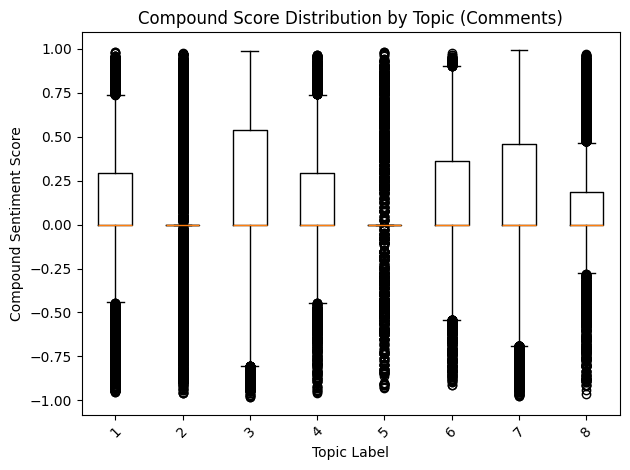

In [14]:
# plot the boxplot
plt.figure()
plt.boxplot(compound_scores_by_topic, tick_labels=[str(t) for t in unique_topics])
plt.xlabel('Topic Label')
plt.ylabel('Compound Sentiment Score')
plt.title('Compound Score Distribution by Topic (Comments)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

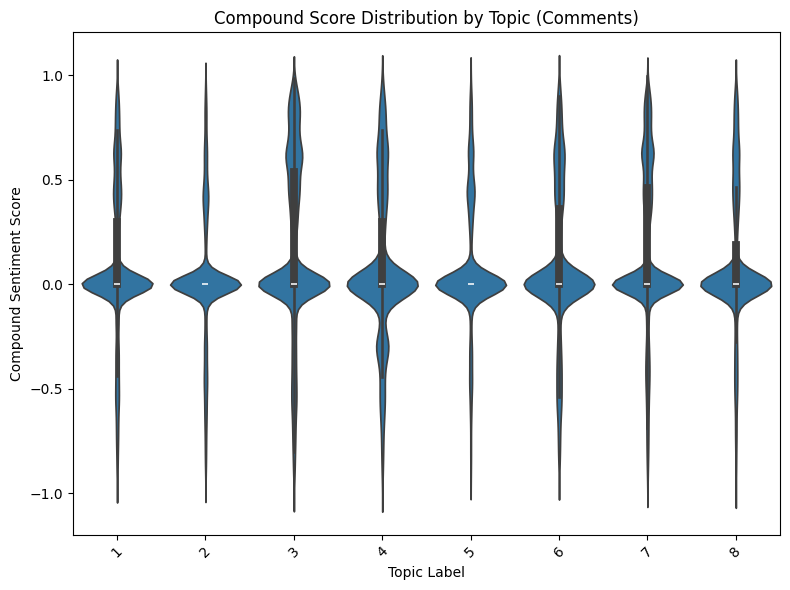

In [15]:
violin_data = merged_df[['topic', 'compound']]

# Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='topic', y='compound', data=violin_data, density_norm='width')
plt.xlabel('Topic Label')
plt.ylabel('Compound Sentiment Score')
plt.title('Compound Score Distribution by Topic (Comments)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

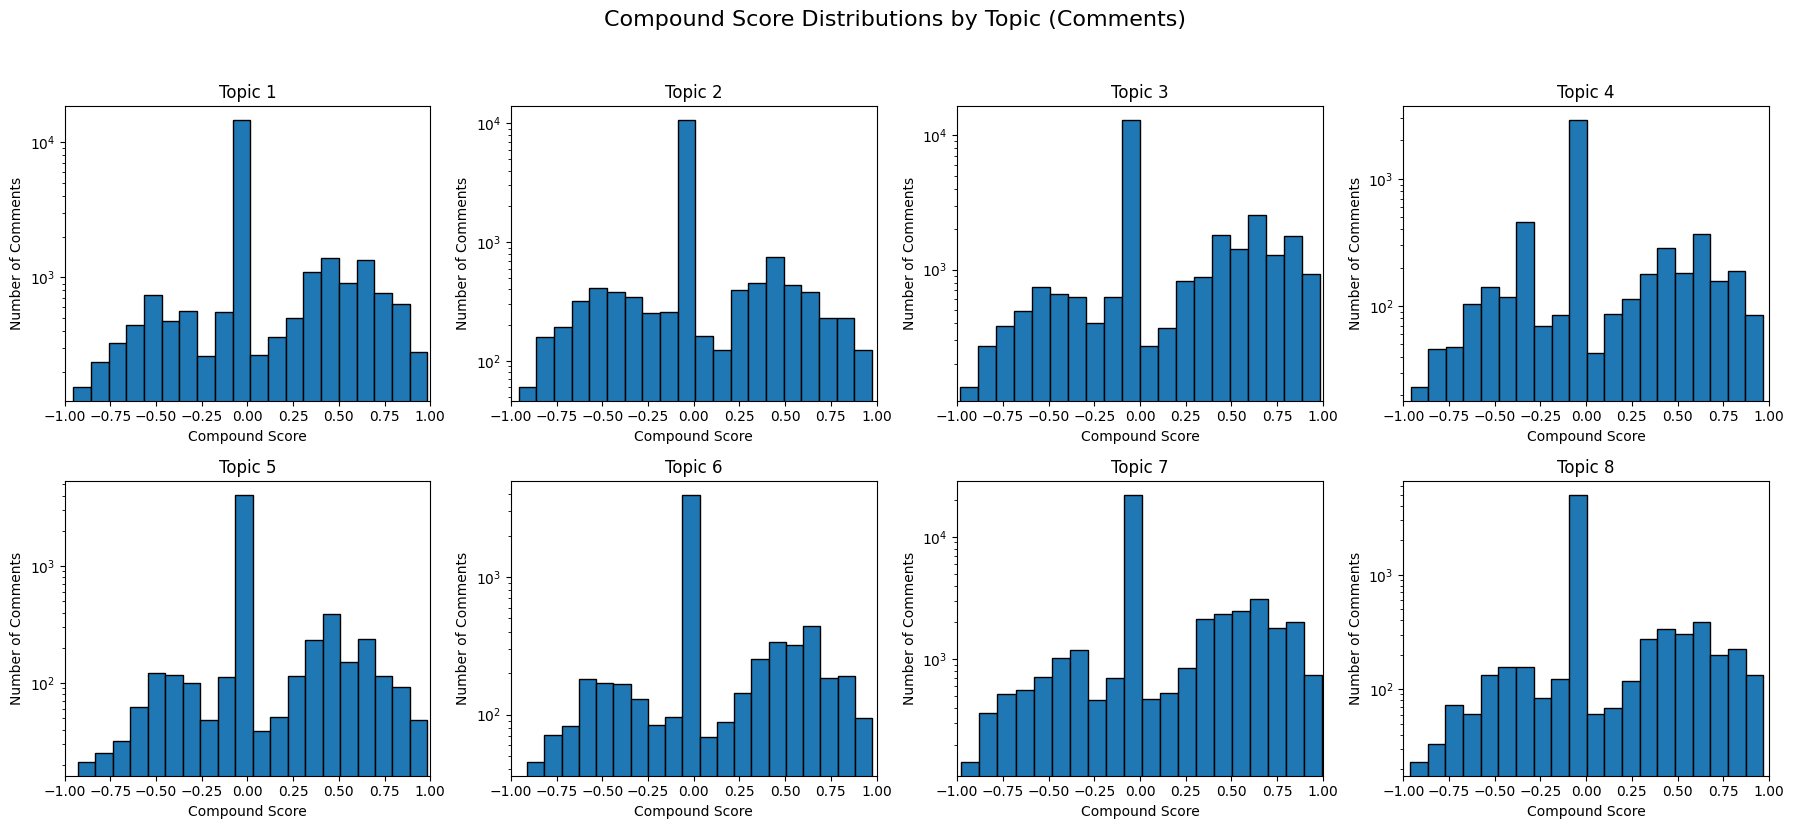

In [57]:
comment_data = merged_df[['topic', 'compound']]

# Get sorted topic labels
topics = sorted(comment_data['topic'].unique())

# Create 2x4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

# Plot histograms
for i, topic in enumerate(topics):
    topic_comments = comment_data[comment_data['topic'] == topic]['compound']
    axes[i].hist(topic_comments, bins=20, edgecolor='black', log=True)
    axes[i].set_title(f'Topic {topic}')
    axes[i].set_xlabel('Compound Score')
    axes[i].set_ylabel('Number of Comments')
    axes[i].set_xlim(-1, 1)

fig.suptitle('Compound Score Distributions by Topic (Comments)', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

In [25]:
# Gather toxicity scores for each topic
toxicity_by_topic = [
    merged_df.loc[merged_df['topic'] == t, 'toxicity']
    for t in unique_topics
]

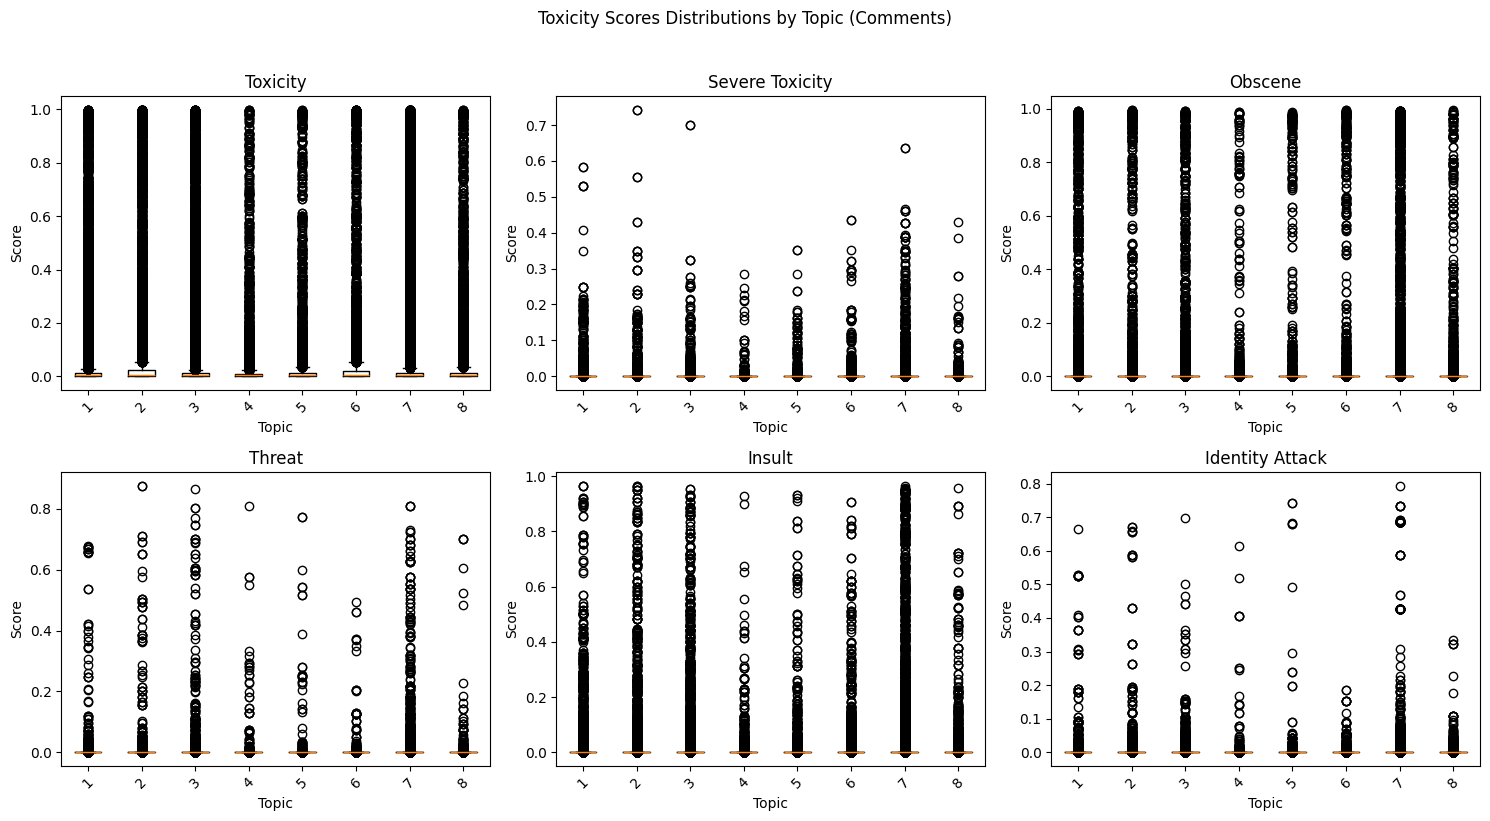

In [26]:
metrics = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=False)

for ax, metric in zip(axes.flatten(), metrics):
    data = [
        merged_df.loc[merged_df['topic'] == t, metric]
        for t in unique_topics
    ]
    ax.boxplot(data, tick_labels=[str(t) for t in unique_topics])
    ax.set_title(metric.replace('_', ' ').title())
    ax.set_xlabel("Topic")
    ax.set_ylabel("Score")
    ax.tick_params(axis='x', rotation=45)

fig.suptitle('Toxicity Scores Distributions by Topic (Comments)', y=1.02)
plt.tight_layout()
plt.show()

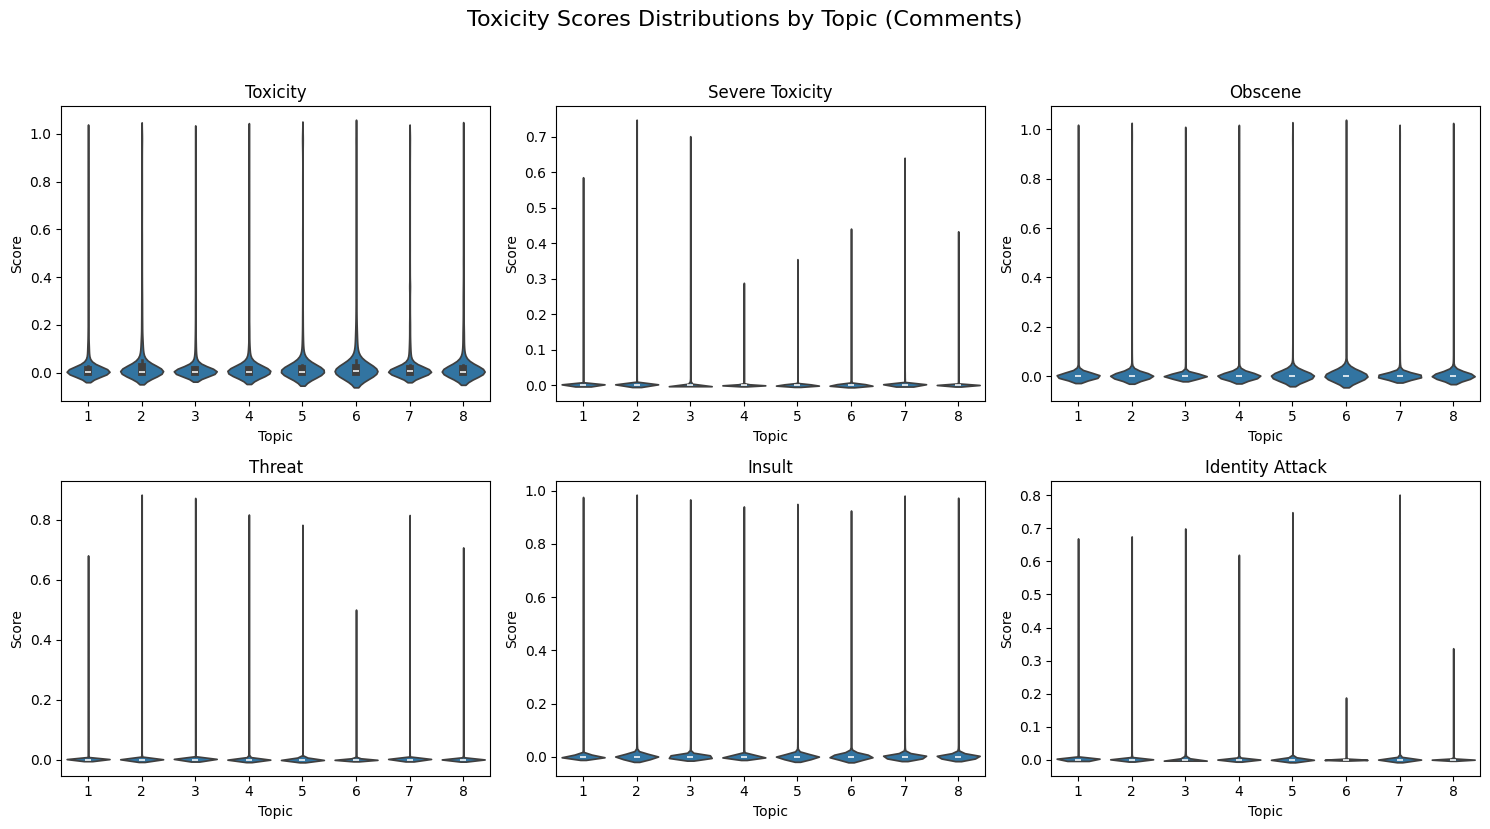

In [30]:
# Filter and melt data to long format for Seaborn
violin_data = merged_df[['topic'] + metrics].dropna()

# Set up figure
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Draw a violin plot for each metric
for i, metric in enumerate(metrics):
    sns.violinplot(
        x='topic',
        y=metric,
        data=violin_data,
        ax=axes[i],
        density_norm='width'         # Makes violin widths consistent
    )
    axes[i].set_title(f'{metric.replace("_", " ").title()}')
    axes[i].set_xlabel('Topic')
    axes[i].set_ylabel('Score')

fig.suptitle('Toxicity Scores Distributions by Topic (Comments)', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

In [31]:
aggregated_topic = merged_df.groupby("topic").agg({
    "neg": "mean",
    "neu": "mean",
    "pos": "mean",
    "compound": "mean",
    "toxicity": "mean",
    "severe_toxicity": "mean",
    "obscene": "mean",
    "threat": "mean",
    "insult": "mean",
    "identity_attack": "mean",
    "reply_count": "sum",
    "like_count": "sum",
    # Count the number of videos for each topic:
    "video_id": "count"
}).rename(columns={"video_id": "video_count"})

aggregated_topic.reset_index(inplace=True)


In [32]:
aggregated_topic

,topic,neg,neu,pos,compound,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,reply_count,like_count,video_count
0,1,0.061877,0.768499,0.144136,0.085244,0.049972,0.001189,0.016882,0.001078,0.006042,0.001237,9966,77850,25932
1,2,0.063615,0.824419,0.094275,0.028906,0.062422,0.001599,0.016567,0.001824,0.010405,0.001788,5496,81124,16393
2,3,0.060698,0.704844,0.203496,0.170755,0.047326,0.000824,0.010940,0.001596,0.007837,0.001096,9607,155695,29488
3,4,0.091451,0.754154,0.136980,0.078790,0.040482,0.000784,0.010636,0.001711,0.004148,0.001263,2122,35549,5684
4,5,0.047473,0.809536,0.124081,0.079053,0.048319,0.001495,0.018601,0.001719,0.007390,0.001543,2680,16228,6186
5,6,0.054189,0.787021,0.144040,0.094926,0.065536,0.001927,0.024073,0.001311,0.010446,0.001123,3076,29878,7119
6,7,0.055937,0.737676,0.178336,0.151728,0.058751,0.001466,0.017582,0.001860,0.010342,0.002541,19593,466935,44243
7,8,0.047240,0.806113,0.126125,0.095899,0.053671,0.001009,0.015540,0.001238,0.006976,0.001188,3159,12356,7943


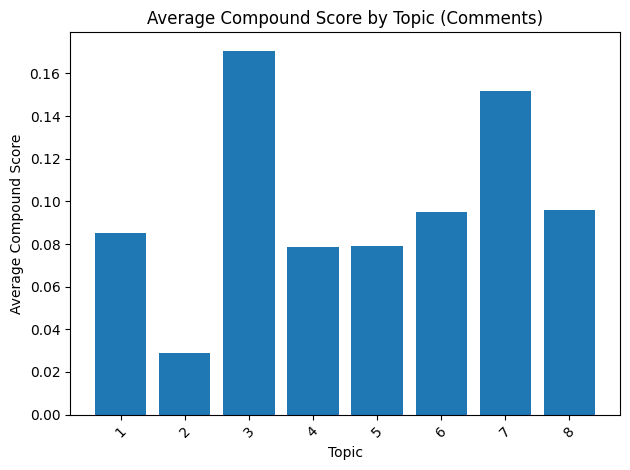

In [33]:
# -----  Bar Plot for Topic-level Compound Scores -----
# Each bar represents the average compound score for a topic (from aggregated_topic)
plt.figure()
plt.bar(aggregated_topic['topic'].astype(str), aggregated_topic['compound'])
plt.xlabel('Topic')
plt.ylabel('Average Compound Score')
plt.title('Average Compound Score by Topic (Comments)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

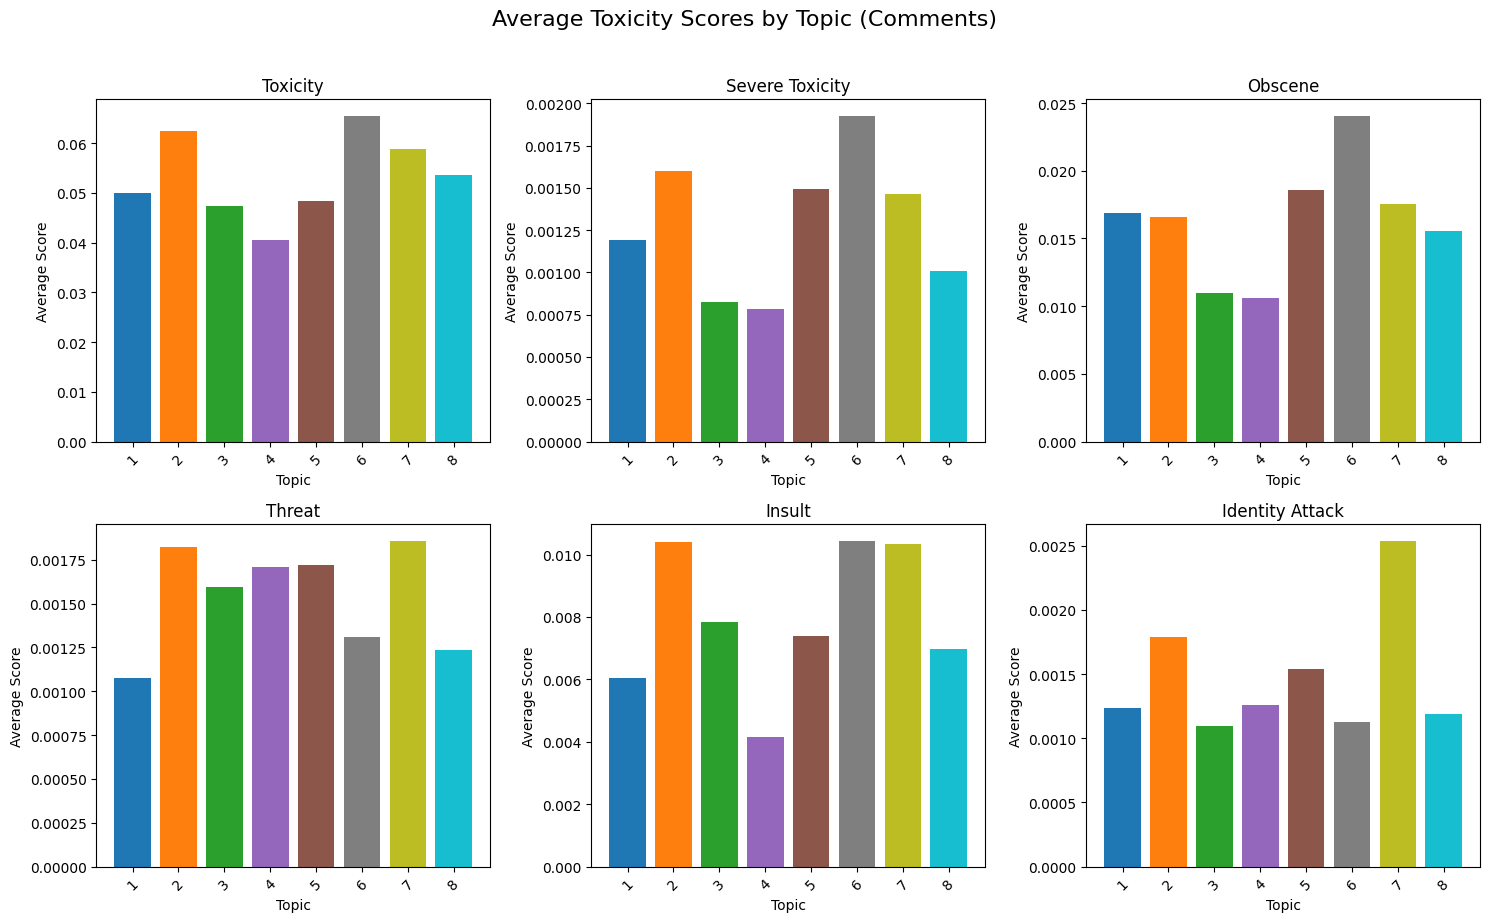

In [34]:
# Ensure topics are strings and get the number of topics
topics = aggregated_topic['topic'].astype(str)
num_topics = len(topics)

# Generate an array of colors from a colormap
colors = plt.cm.tab10(np.linspace(0, 1, num_topics))

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

metrics = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']

# Flatten axes for easier looping
axs = axs.flatten()

# Plot each metric
for ax, metric in zip(axs, metrics):
    ax.bar(topics, aggregated_topic[metric], color=colors)
    ax.set_xlabel('Topic')
    ax.set_ylabel('Average Score')
    ax.set_title(metric.replace('_', ' ').title())
    ax.tick_params(axis='x', rotation=45)

# Add a main title
fig.suptitle('Average Toxicity Scores by Topic (Comments)', fontsize=16, y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

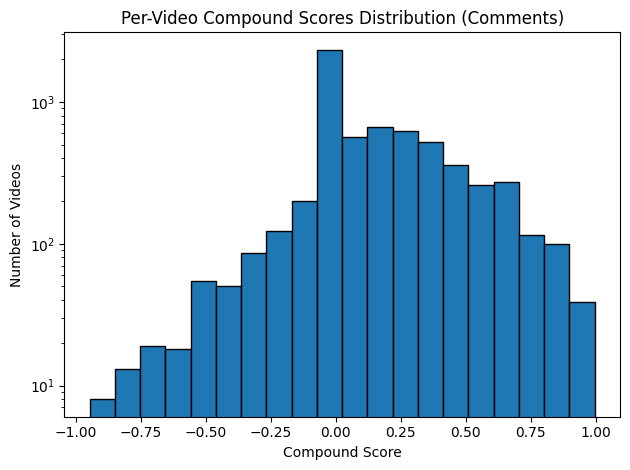

In [35]:
# -----  Histogram for Video-level Compound Scores -----
# This plot shows the distribution of compound scores across all videos (from aggregated_video)
plt.figure()
plt.hist(aggregated_video['compound'], bins=20, edgecolor='black')
plt.xlabel('Compound Score')
plt.ylabel('Number of Videos')
plt.title('Per-Video Compound Scores Distribution (Comments)')
plt.yscale('log')  
plt.tight_layout()
plt.show()

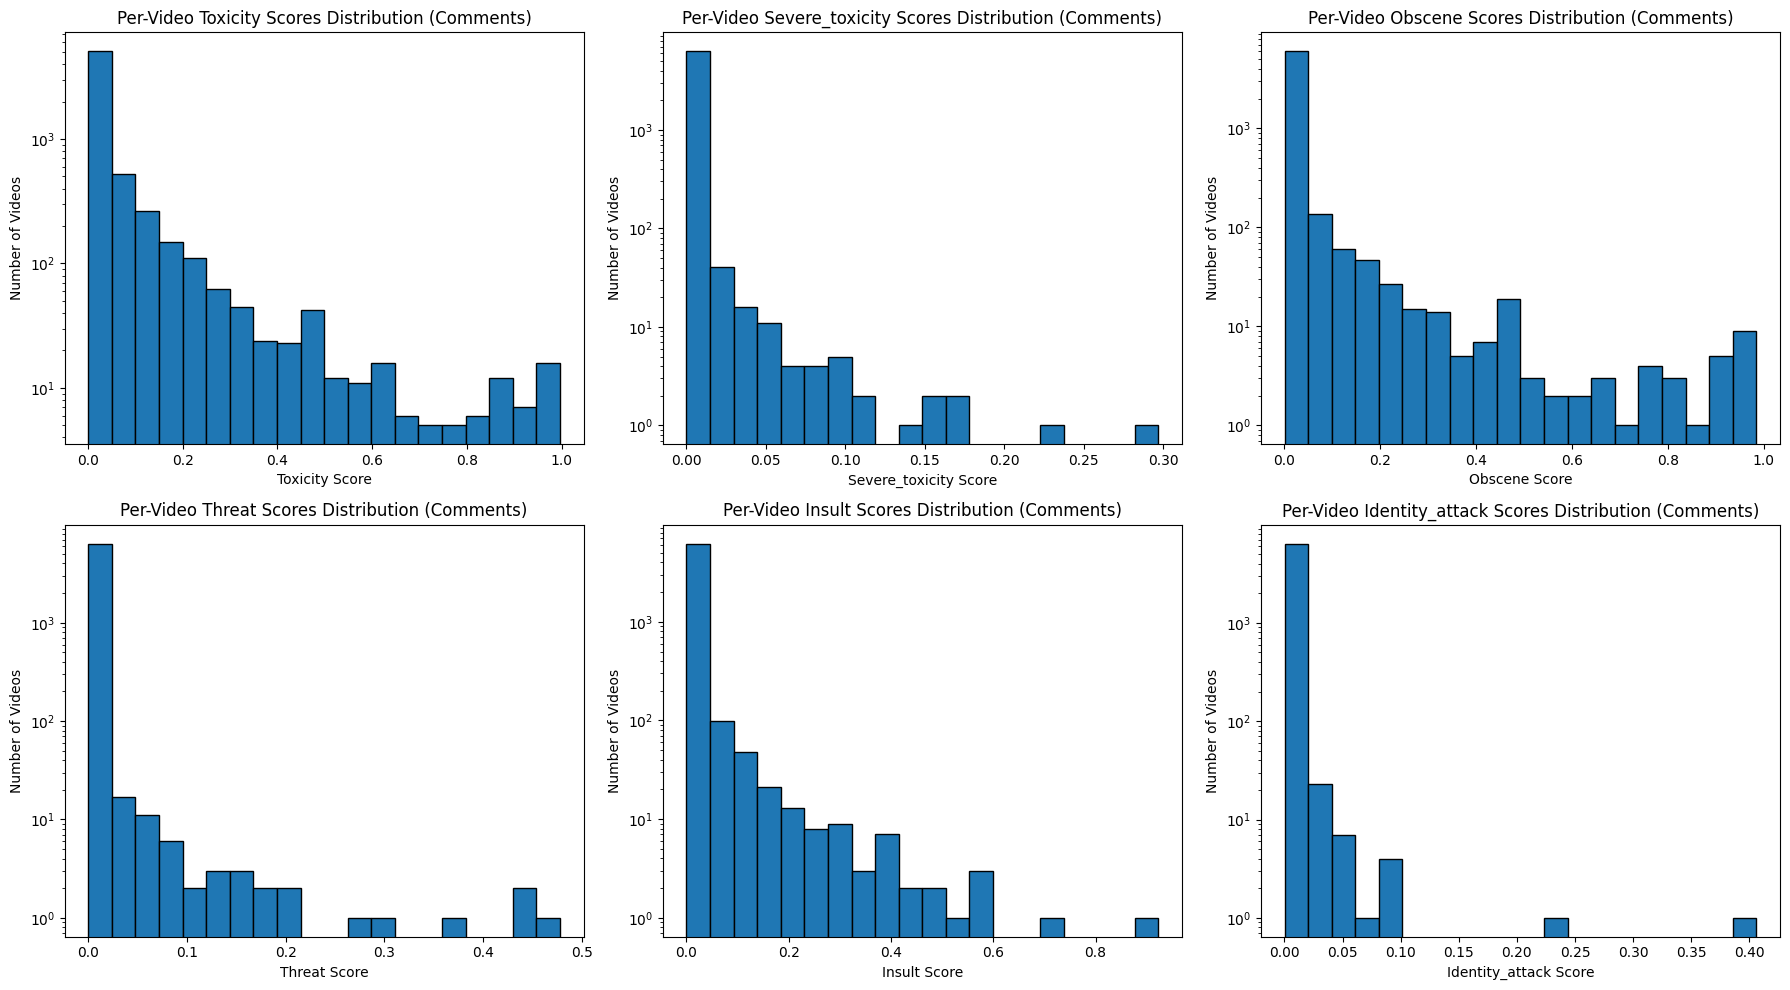

In [36]:
# ----- Histogram for Video-level Toxicity Scores -----

# List of toxicity metrics to plot
metrics = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()  # Flatten the array for easier iteration

# Loop through each metric and create its histogram
for i, metric in enumerate(metrics):
    axs[i].hist(aggregated_video[metric], bins=20, edgecolor='black', log=True)
    axs[i].set_xlabel(f'{metric.capitalize()} Score')
    axs[i].set_ylabel('Number of Videos')
    axs[i].set_title(f'Per-Video {metric.capitalize()} Scores Distribution (Comments)')

plt.tight_layout()
plt.show()

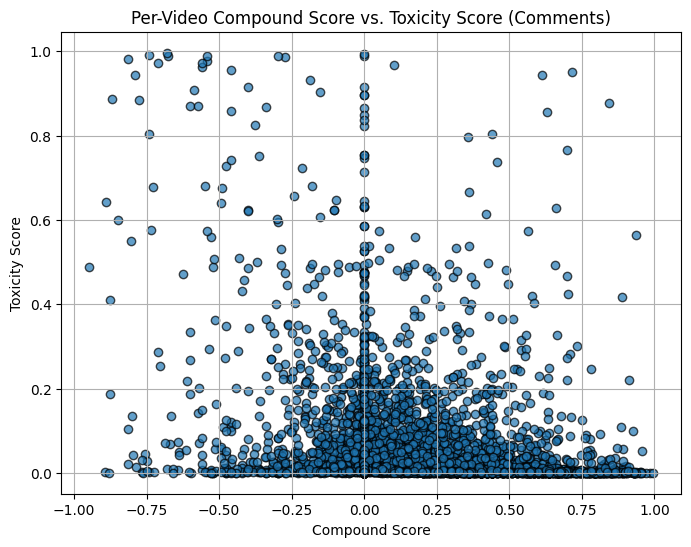

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(aggregated_video['compound'], aggregated_video['toxicity'], alpha=0.7, edgecolor='k')
plt.xlabel("Compound Score")
plt.ylabel("Toxicity Score")
plt.title("Per-Video Compound Score vs. Toxicity Score (Comments)")
plt.grid(True)
plt.show()

In [45]:
def analyze_text(text):
    # Check if the input is not a string (e.g., NaN or other type)
    if not isinstance(text, str):
        return {
            "neg": None,
            "neu": None,
            "pos": None,
            "compound": None,
            "toxicity": None,
            "severe_toxicity": None,
            "obscene": None,
            "threat": None,
            "insult": None,
            "identity_attack": None
        }
    # Compute sentiment scores with VADER
    sentiment = sid.polarity_scores(text)
    # Compute toxicity scores with Detoxify
    toxicity = detoxify_model.predict(text)
    # Combine both dictionaries
    combined = {**sentiment, **toxicity}
    return combined

In [46]:
topic_data['analysis'] = topic_data['processed_text'].apply(analyze_text)

In [47]:
analysis_df = topic_data['analysis'].apply(pd.Series)
video_sentiment = pd.concat([topic_data, analysis_df], axis=1)

In [51]:
pd.set_option('display.max_columns', None)
video_sentiment.head()

,share_count,username,video_description,comment_count,create_time,hashtag_names,video_id,like_count,music_id,region_code,view_count,effect_ids,voice_to_text,playlist_id,source_file,favorites_count,combined_text,processed_text,topic,analysis,neg,neu,pos,compound,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,0,nikkirobbi,#mentalhealthmatters #mentalhealthawareness #d...,11.0,1685992641,"['mentalhealthmatters', 'mentalhealthawareness...",7241283196241874219,46.0,7.241283e+18,US,11,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealthmatters #mentalhealthawareness #d...,depression depression,3,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,-0.8126,0.001372,0.000102,0.000178,0.000105,0.000219,0.000165
1,0,this.ls.me.trying,I miss who I used to be. #depression #anxiety ...,1.0,1686005794,"['sad', 'depressed', 'anxiety', 'bipolar', 'me...",7241339690962488622,51.0,7.080006e+18,US,19,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,I miss who I used to be. #depression #anxiety ...,miss used depression anxiety sad ptsd depresse...,2,"{'neg': 0.783, 'neu': 0.217, 'pos': 0.0, 'comp...",0.783,0.217,0.0,-0.9726,0.143365,0.000168,0.001934,0.000306,0.005990,0.000526
2,0,darkhearted22,#mentalhealth #mentalhealthmatters #mentalheal...,0.0,1685999424,"['mentalhealth', 'mentalhealthmatters', 'menta...",7241312338358340890,3.0,7.235458e+18,GB,27,['20262908'],NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealth #mentalhealthmatters #mentalheal...,NaN,1,"{'neg': None, 'neu': None, 'pos': None, 'compo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,amandadanielle32,#mentalhealthmatters #mentalhealthawareness #m...,7.0,1685982335,"['mentalhealth', 'mentalhealthmatters', 'menta...",7241238903401893163,63.0,7.130767e+18,US,48,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealthmatters #mentalhealthawareness #m...,NaN,1,"{'neg': None, 'neu': None, 'pos': None, 'compo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,elevensbaldassheadd,:( #mentalhealthawareness #mentalillness #ment...,0.0,1686007920,"['mentalillness', 'mentalhealthmatters', 'ment...",7241348708799876379,25.0,7.238682e+18,GB,195,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,:( #mentalhealthawareness #mentalillness #ment...,NaN,1,"{'neg': None, 'neu': None, 'pos': None, 'compo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Save to CSV
video_sentiment.to_csv('video_sentiment.csv', index=False)

In [38]:
video_sentiment = pd.read_csv('video_sentiment.csv')

In [39]:
# List of unique topic labels
unique_topics = sorted(video_sentiment['topic'].unique())

In [40]:
# For each topic, grab the array of compound scores
compound_arrays = []
for t in unique_topics:
    # remove NaN before adding
    vals = video_sentiment.loc[video_sentiment['topic']==t, 'compound'].dropna()
    compound_arrays.append(vals)

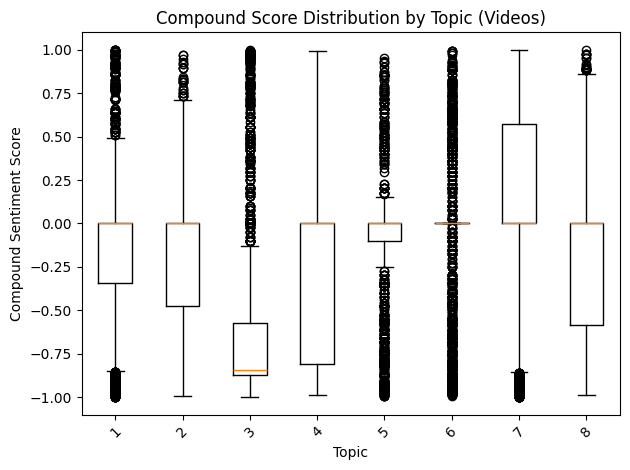

In [41]:
plt.figure()
plt.boxplot(compound_arrays, tick_labels=[str(t) for t in unique_topics])
plt.xlabel('Topic')
plt.ylabel('Compound Sentiment Score')
plt.title('Compound Score Distribution by Topic (Videos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

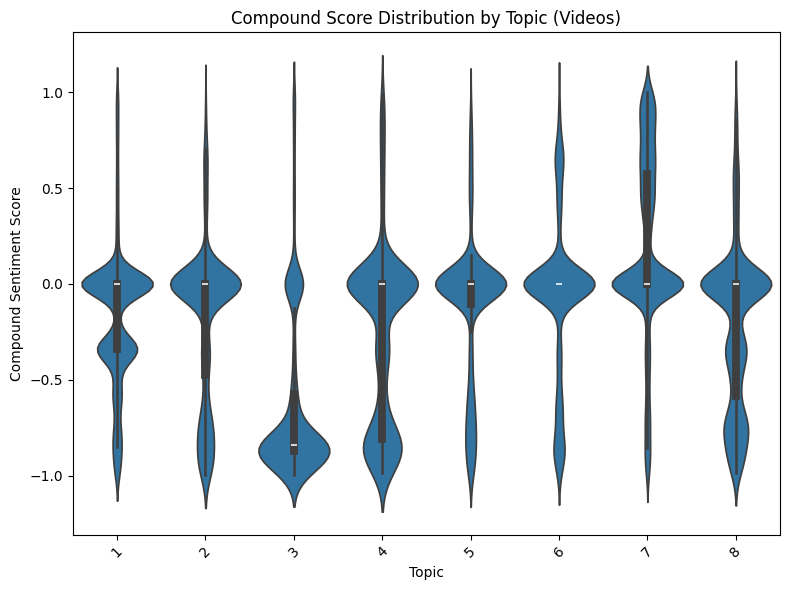

In [44]:
# Drop NaNs to avoid plotting issues
violin_data = video_sentiment[['topic', 'compound']].dropna()

# Plot the violin
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='topic',
    y='compound',
    data=violin_data,
    density_norm='width'
)

plt.xlabel('Topic')
plt.ylabel('Compound Sentiment Score')
plt.title('Compound Score Distribution by Topic (Videos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

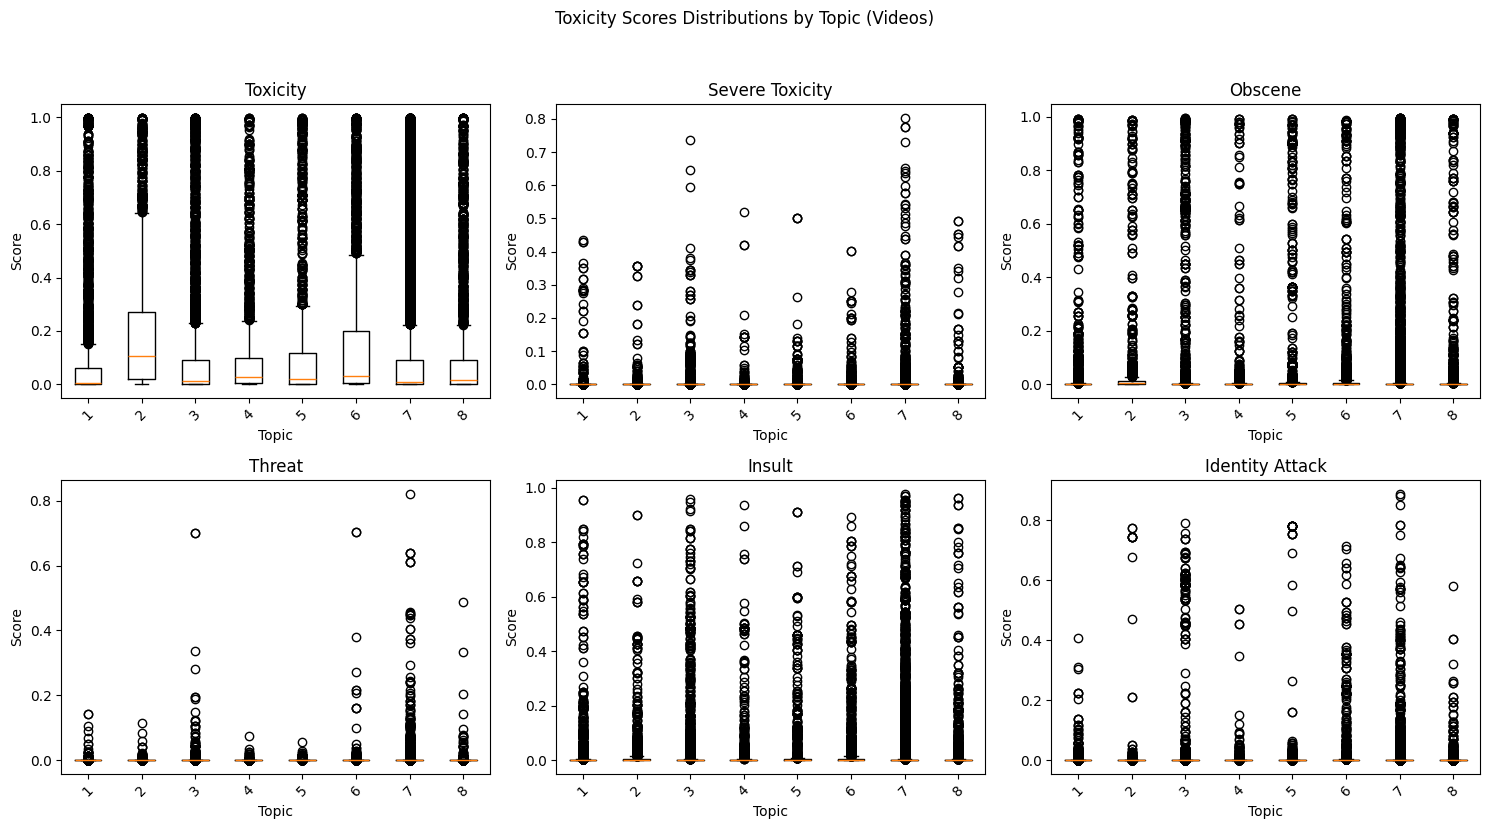

In [45]:
tox_metrics = [
    "toxicity",
    "severe_toxicity",
    "obscene",
    "threat",
    "insult",
    "identity_attack"
]

# Build one clean (NaN‑free) list of Series per metric
metric_arrays = {}
for metric in tox_metrics:
    metric_arrays[metric] = [
        video_sentiment.loc[video_sentiment["topic"] == t, metric].dropna()
        for t in unique_topics
    ]

#  Plot: 2 × 3 grid of box‑plots (one for each toxicity metric)
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=False)

for ax, metric in zip(axes.flatten(), tox_metrics):
    ax.boxplot(
        metric_arrays[metric],
        tick_labels=[str(t) for t in unique_topics],
    )
    ax.set_title(metric.replace("_", " ").title())
    ax.set_xlabel("Topic")
    ax.set_ylabel("Score")
    ax.tick_params(axis="x", rotation=45)

fig.suptitle("Toxicity Scores Distributions by Topic (Videos)", y=1.03)
plt.tight_layout()
plt.show()

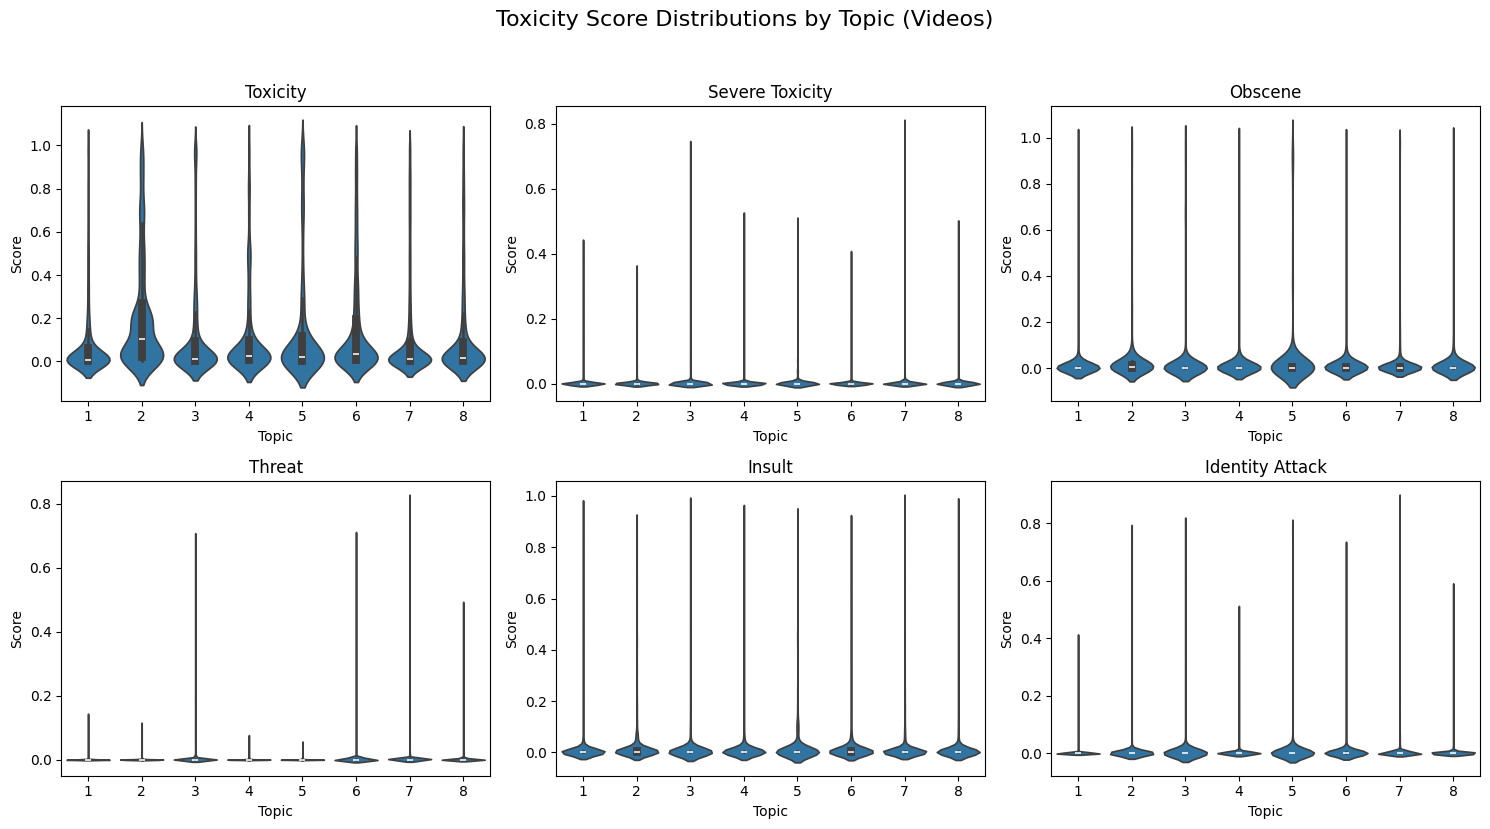

In [47]:
# Drop rows with NaNs to ensure clean plots
violin_data = video_sentiment[['topic'] + tox_metrics].dropna()

# Set up the 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Plot each toxicity score as a violin per topic
for i, metric in enumerate(tox_metrics):
    sns.violinplot(
        x='topic',
        y=metric,
        data=violin_data,
        ax=axes[i],
        density_norm='width'        # Keeps all violins same width regardless of sample size
    )
    axes[i].set_title(metric.replace('_', ' ').title())
    axes[i].set_xlabel('Topic')
    axes[i].set_ylabel('Score')

# Main title and layout
fig.suptitle('Toxicity Score Distributions by Topic (Videos)', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

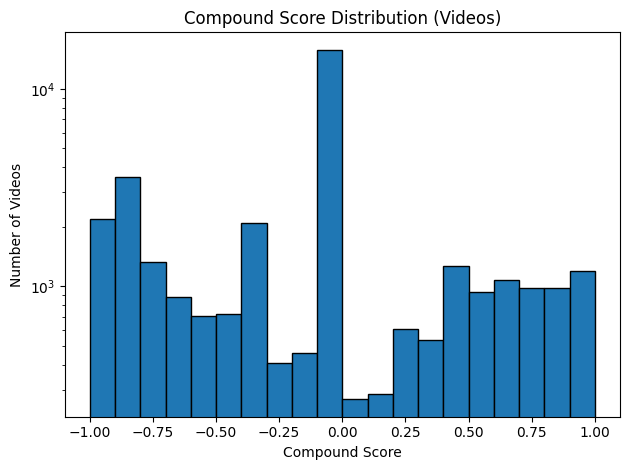

In [48]:
plt.figure()
plt.hist(video_sentiment['compound'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Compound Score')
plt.ylabel('Number of Videos')
plt.title('Compound Score Distribution (Videos)')
plt.yscale('log')
plt.tight_layout()
plt.show()

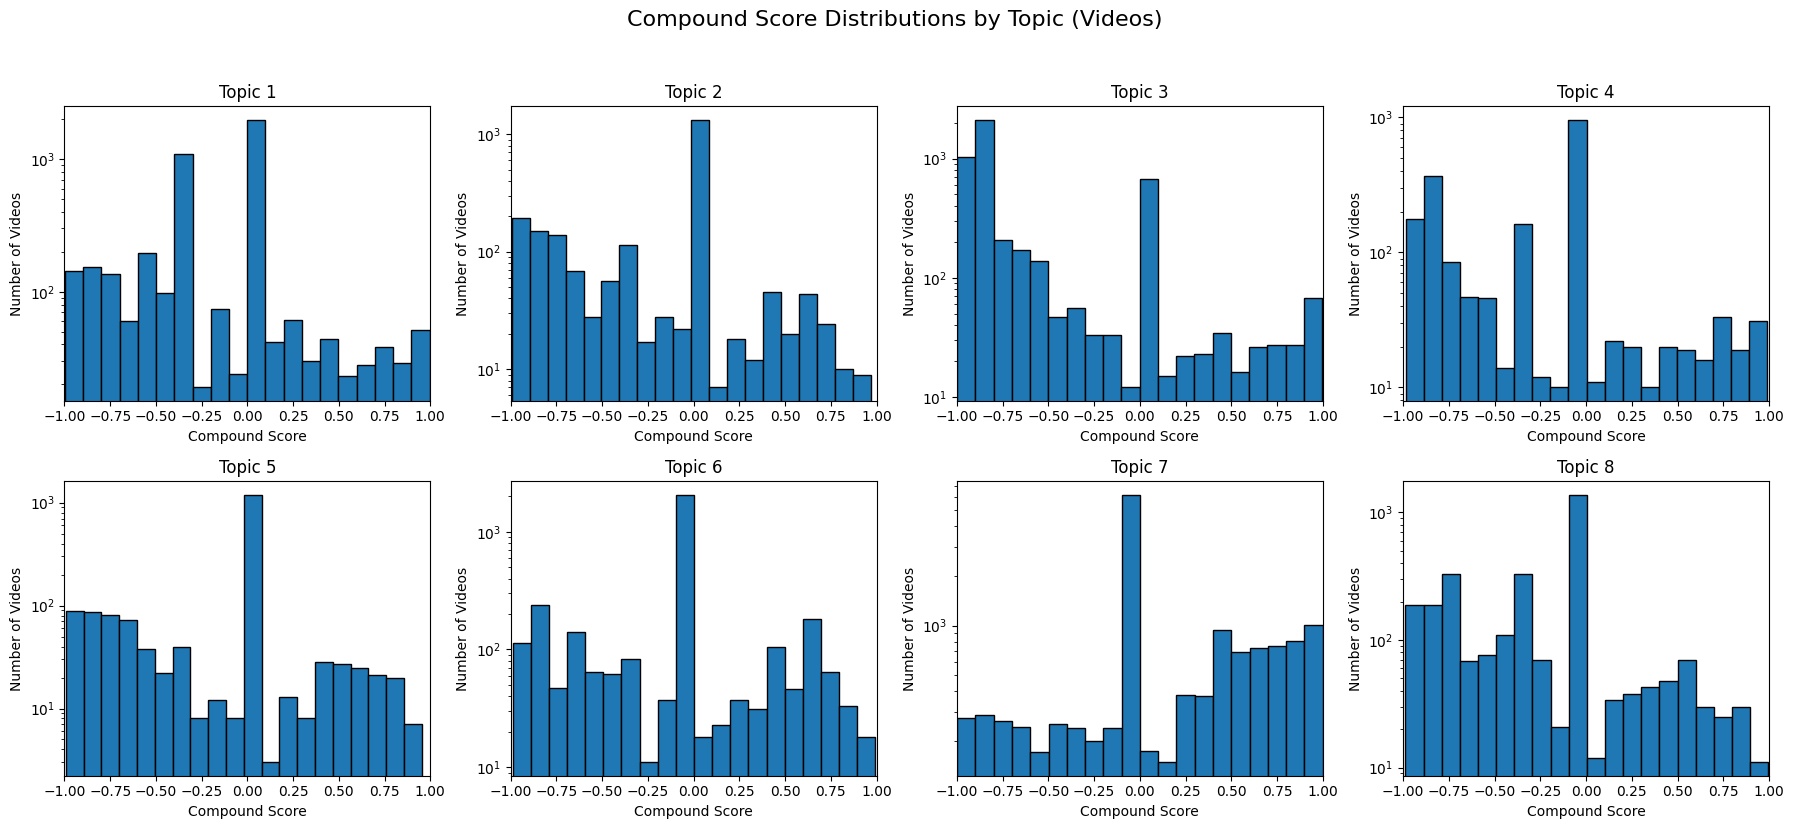

In [52]:
# Drop NaNs to avoid issues
clean_df = video_sentiment[['topic', 'compound']].dropna()

# Get sorted list of unique topics
topics = sorted(clean_df['topic'].unique())

# Set up subplot grid (e.g., 2x4 for 8 topics)
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

# Plot histogram for each topic
for i, topic in enumerate(topics):
    topic_data = clean_df[clean_df['topic'] == topic]['compound']
    axes[i].hist(topic_data, bins=20, edgecolor='black', log=True)
    axes[i].set_title(f'Topic {topic}')
    axes[i].set_xlabel('Compound Score')
    axes[i].set_ylabel('Number of Videos')
    axes[i].set_xlim(-1, 1)

# Layout adjustments
fig.suptitle('Compound Score Distributions by Topic (Videos)', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

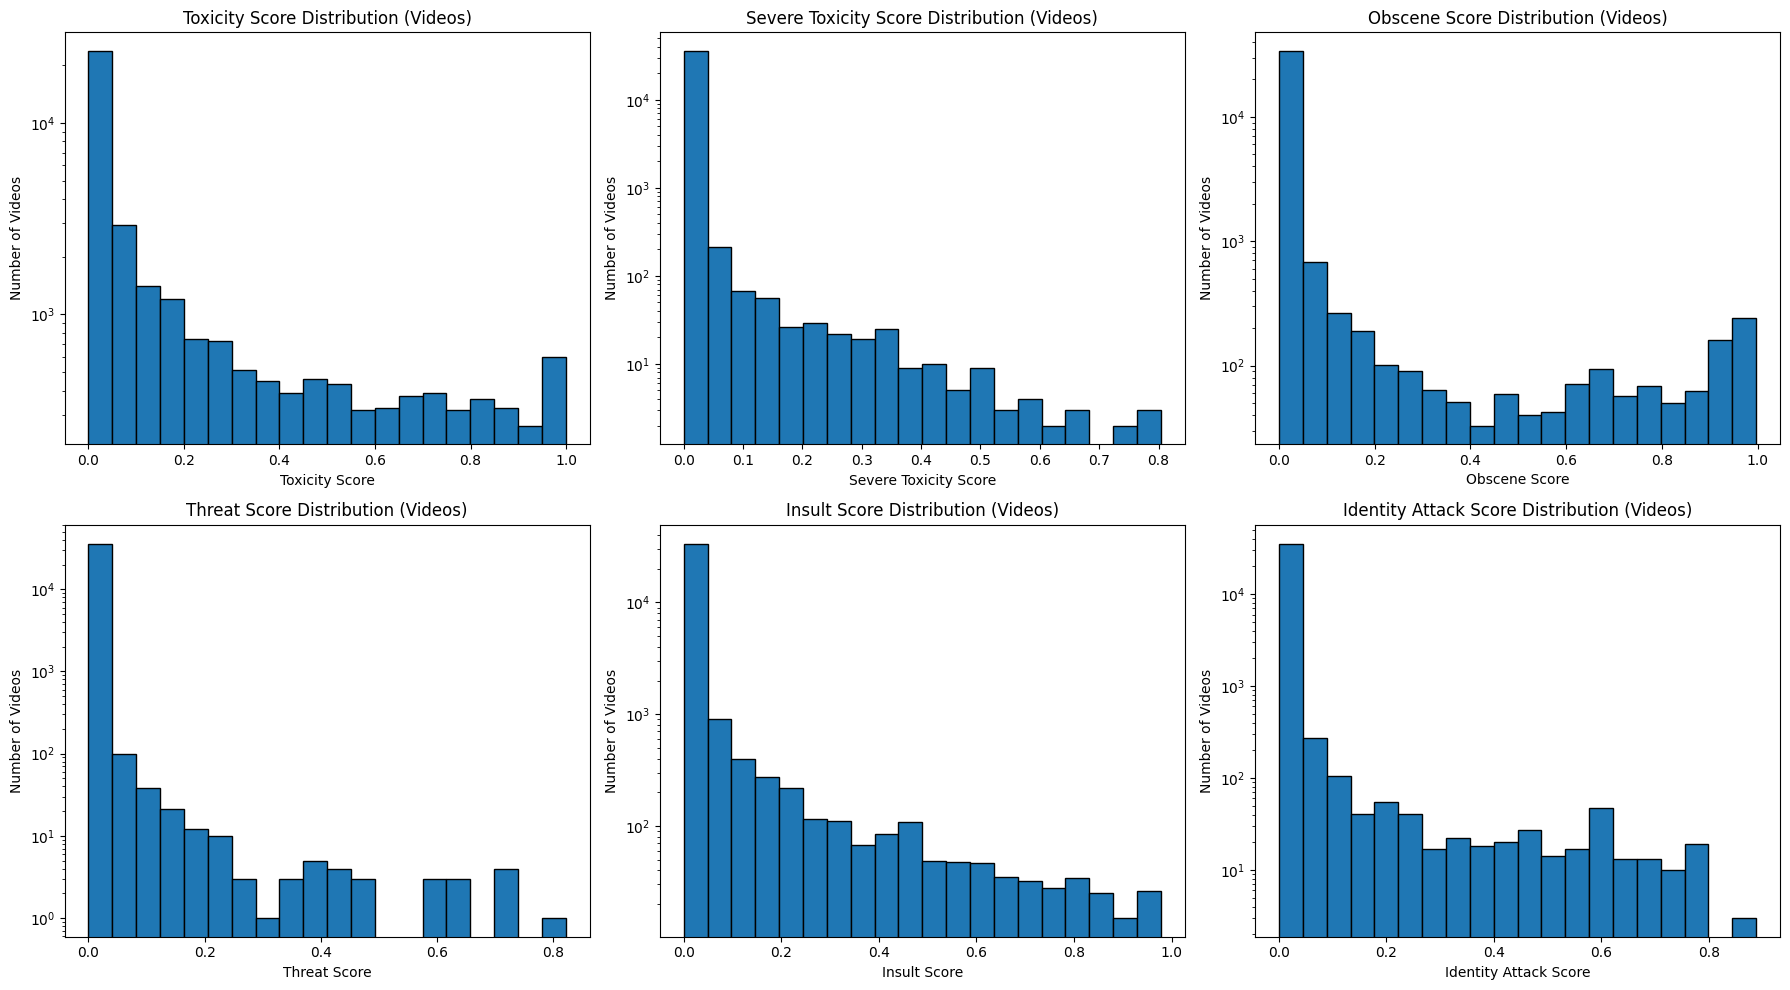

In [49]:
# Toxicity-related metrics to visualize
toxicity_metrics = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot histograms for each toxicity metric
for i, metric in enumerate(toxicity_metrics):
    axes[i].hist(video_sentiment[metric].dropna(), bins=20, edgecolor='black', log=True)
    axes[i].set_xlabel(f'{metric.replace("_", " ").title()} Score')
    axes[i].set_ylabel('Number of Videos')
    axes[i].set_title(f'{metric.replace("_", " ").title()} Score Distribution (Videos)')

plt.tight_layout()
plt.show()

In [53]:
aggregated_video_topic = video_sentiment.groupby("topic").agg({
    "neg": "mean",
    "neu": "mean",
    "pos": "mean",
    "compound": "mean",
    "toxicity": "mean",
    "severe_toxicity": "mean",
    "obscene": "mean",
    "threat": "mean",
    "insult": "mean",
    "identity_attack": "mean",
    "like_count": "sum",
    "comment_count": "sum",
    "view_count": "sum",
    # Count the number of videos for each topic:
    "video_id": "count"
}).rename(columns={"video_id": "video_count"})

aggregated_video_topic.reset_index(inplace=True)

In [54]:
aggregated_video_topic

,topic,neg,neu,pos,compound,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,like_count,comment_count,view_count,video_count
0,1,0.299582,0.654695,0.041110,-0.179296,0.094873,0.002286,0.022592,0.000688,0.013128,0.002040,6328031.0,566575.0,35350628,11320
1,2,0.194367,0.751300,0.054345,-0.191632,0.211769,0.002538,0.036664,0.000955,0.019472,0.004097,7115024.0,675895.0,32233178,2335
2,3,0.540674,0.398581,0.060755,-0.630151,0.123294,0.003964,0.036607,0.001893,0.021366,0.013468,6544969.0,246512.0,60975865,4771
3,4,0.245773,0.703808,0.050412,-0.265308,0.125183,0.001956,0.020409,0.000749,0.014862,0.002944,1217660.0,85506.0,6927608,2085
4,5,0.144767,0.807294,0.047942,-0.126767,0.148732,0.003940,0.054010,0.000860,0.024208,0.008643,2440454.0,316878.0,10629041,1800
5,6,0.119675,0.803585,0.076741,-0.068603,0.155589,0.002527,0.027769,0.001867,0.021333,0.010909,1564334.0,106454.0,8538451,3416
6,7,0.085580,0.691341,0.223082,0.175071,0.124918,0.003129,0.027795,0.002368,0.021764,0.005382,14663275.0,589573.0,59314697,14389
7,8,0.265134,0.674174,0.060688,-0.218144,0.118496,0.002806,0.026584,0.001445,0.015595,0.003480,3858370.0,411640.0,20898402,3101


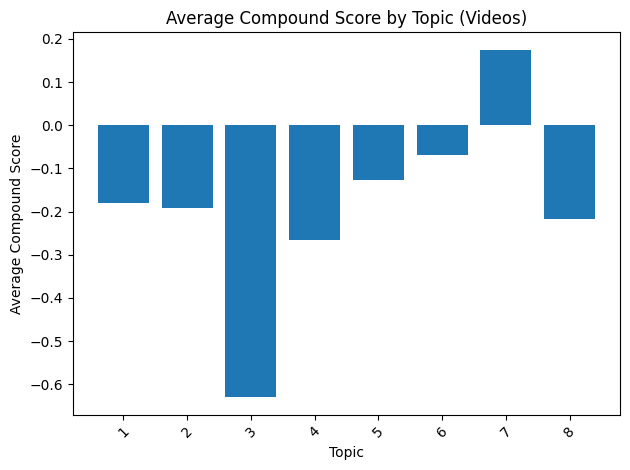

In [55]:
# Each bar represents the average compound score for a topic (from aggregated_video_topic)
plt.figure()
plt.bar(aggregated_video_topic['topic'].astype(str), aggregated_video_topic['compound'])
plt.xlabel('Topic')
plt.ylabel('Average Compound Score')
plt.title('Average Compound Score by Topic (Videos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

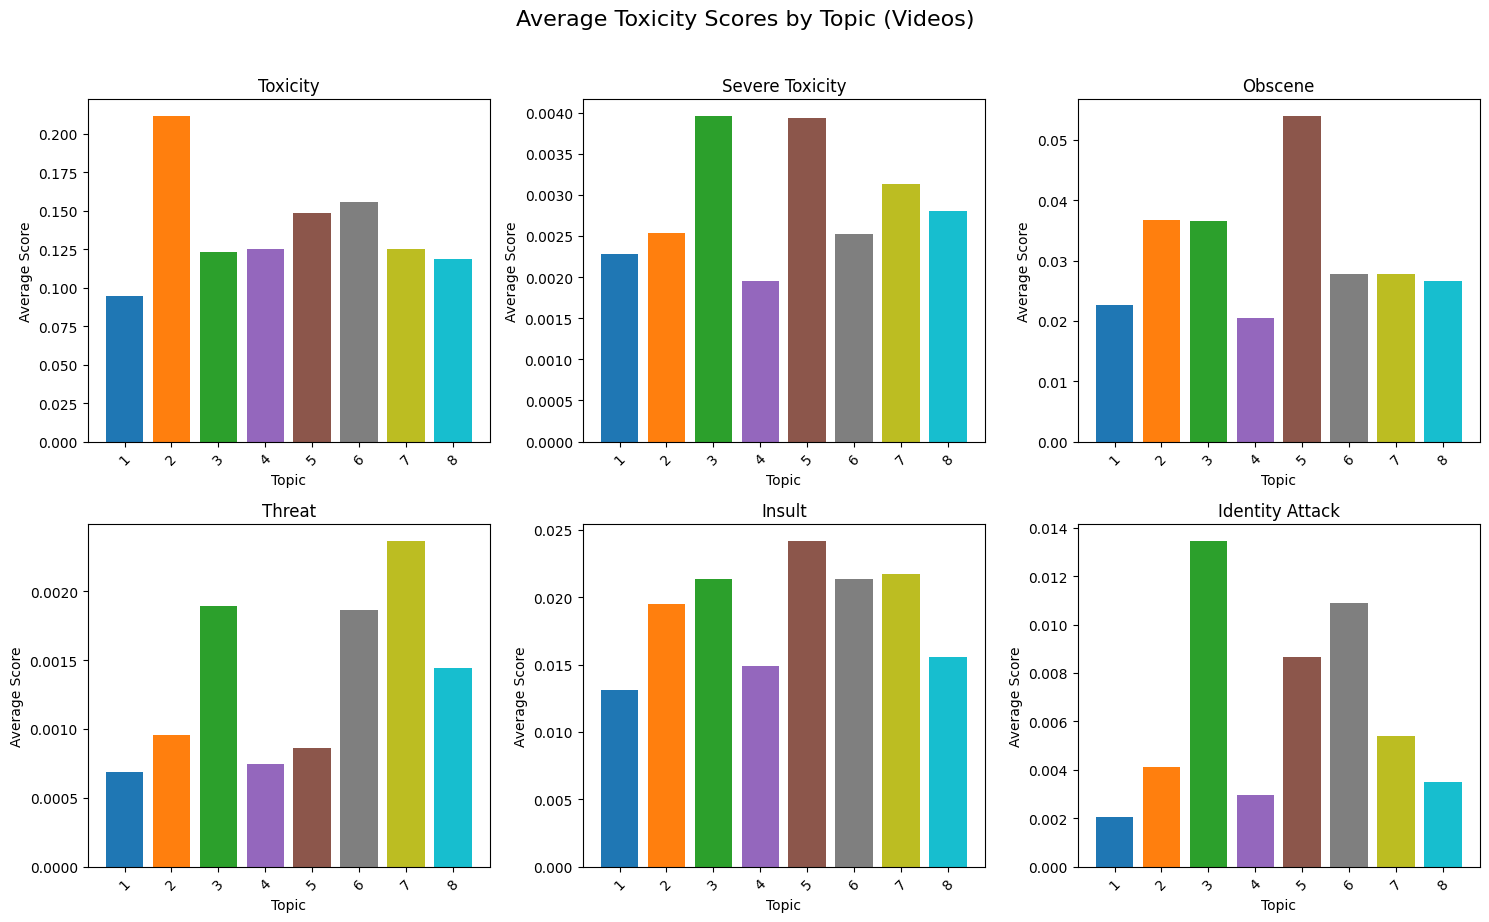

In [56]:
# Ensure topics are strings and get the number of topics
topics = aggregated_video_topic['topic'].astype(str)
num_topics = len(topics)

# Generate an array of colors from a colormap
colors = plt.cm.tab10(np.linspace(0, 1, num_topics))

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

metrics = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']

# Flatten axes for easier looping
axs = axs.flatten()

# Plot each metric
for ax, metric in zip(axs, metrics):
    ax.bar(topics, aggregated_video_topic[metric], color=colors)
    ax.set_xlabel('Topic')
    ax.set_ylabel('Average Score')
    ax.set_title(metric.replace('_', ' ').title())
    ax.tick_params(axis='x', rotation=45)

# Add a main title
fig.suptitle('Average Toxicity Scores by Topic (Videos)', fontsize=16, y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

In [25]:
# Check sample videos
filtered = video_sentiment[
    (video_sentiment['topic'] == 8) &
    (video_sentiment['comment_count'] > 5)
].sample(4)

for _, row in filtered.iterrows():
    print(f"https://www.tiktok.com/@{row['username']}/video/{int(row['video_id'])}")

https://www.tiktok.com/@safe.spac3_4all/video/7225842682994707755
https://www.tiktok.com/@simplyjedi/video/7232479623483903275
https://www.tiktok.com/@sertralinequeenpt2/video/7230082915323907354
https://www.tiktok.com/@thecoolmomtx/video/7235596838605163822
